In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
plt.rcParams['figure.figsize']=[15,8]

In [5]:
dia=pd.read_csv('diabetic_data.csv')
dia.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
dia.shape

(101766, 50)

We have 50 features and 101766 rows, it shows we have enough data to do calculation

In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

initial analysis shows that all the feature are in correct datatype, and there is no null value is present
target variable is readmitted

## Missing value and mismatched value

In [8]:
for cal in dia.columns:
    print('\n')
    print(cal)
    print(dia[cal].value_counts())



encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64


patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64


race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


weight
?            98569
[75

In [9]:
dia['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

we can see that 

1. encounter_id has 0 null and mismatch value and has unique values, that is not required for the models

2. patient_nbr has 0 null value but has only 71518 rows that denotes there is a possibility of duplicate value.there can be a assumption that the same patient is admitted for more than 1 time or there is something wrong about the dataset.

3. Race feature has 2273 mismatched value, at this phase we dont know wheather the feature is significant or not. need further analysis.

4. Gender feature has 3 unkown/invalid value, at this phase we dont know wheather the feature is significant or not. need further analysis.

5. Age feature is in interval of 10 year, need feature eng. to get it ready for the model.

6. Weight feature has approx ~95% of the missing value, we cant impute any value in the place of missing value , so we can discard it.

7. admission_type_id,discharge_disposition_id,admission_source_id are coded .


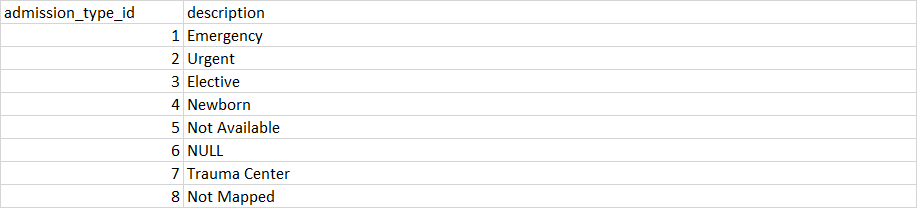

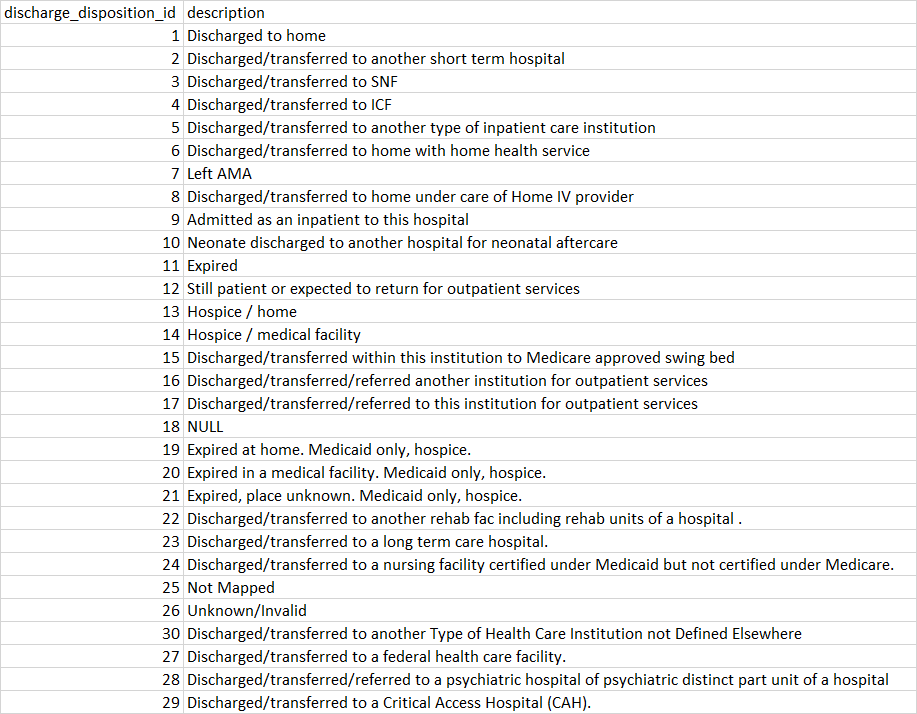

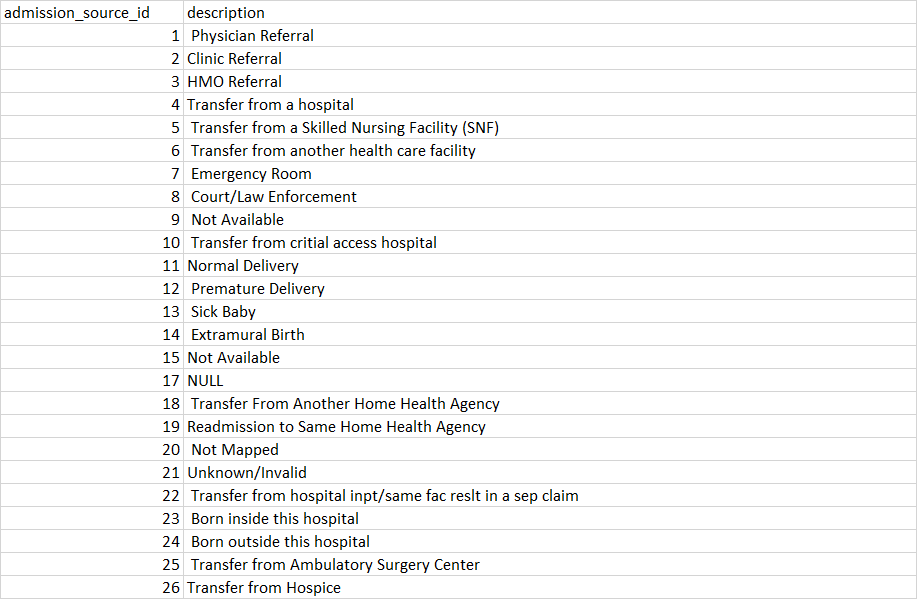

8. time in hospital tells the days spend in hospital.

9. payer code are coded.

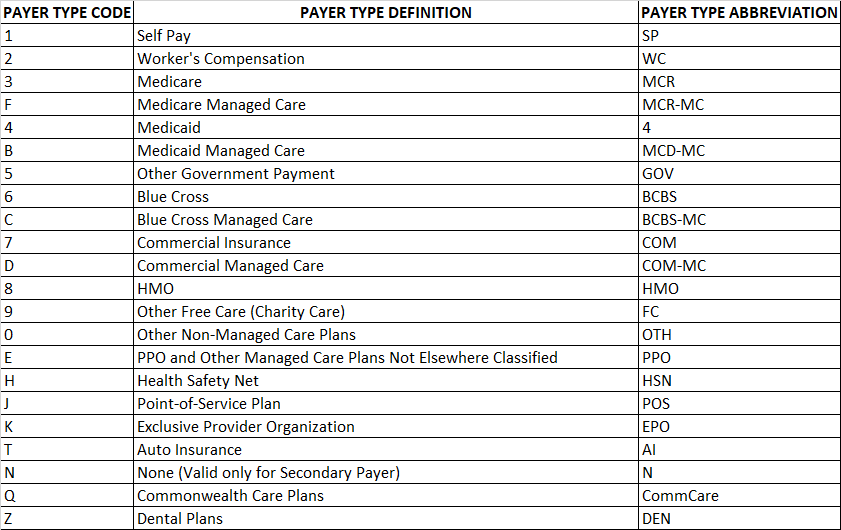

10. medical_specialty describe the department under which the patient is been intially admitted. The feature contain the 49949 unstandard missing value.

11. num_lab_procedures,num_procedures,num_medications show the number of procedure and number of medication done on the patient respectively.

12. diag_1, diag_2,diag_3 are the List of ICD-9 codes:
They are coded in ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes)

The listing below will show you which numbers correspond to which areas of the body and types of treatment:

code|Diseases
---|---
Doctors working001-139|infectious and parasitic diseases:
140-239 |neoplasms
240-279 |endocrine, nutritional and metabolic diseases, and immunity disorders
280-289 |diseases of the blood and blood-forming organs
290-319 |mental disorders
320-359 |diseases of the nervous system
360-389| diseases of the sense organs
390-459| diseases of the circulatory system
460-519| diseases of the respiratory system
520-579| diseases of the digestive system
580-629| diseases of the genitourinary system
630-679| complications of pregnancy, childbirth, and the puerperium
680-709| diseases of the skin and subcutaneous tissue
710-739| diseases of the musculoskeletal system and connective tissue
740-759| congenital anomalies
760-779| certain conditions originating in the perinatal period
780-799| symptoms, signs, and ill-defined conditions
800-999| injury and poisoning
E and V codes| external causes of injury and supplemental classification




13. readmitted is our target variable that has three class


    NO     54864

    >30    35545

    <30    11357

### Data Cleaning

##### Remove Duplicate Data Points

In [10]:
dia['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

There is only 71,518 unique patient records out of 101,766 in the dataset. 

In [11]:
dia = dia.drop_duplicates(subset=['patient_nbr'])

In [12]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications      

Now we only have 71518 rows in our dataset.  

In [13]:
#making a copy for further use
dia_copy=dia.copy()

##### Remove Uninformative Features

the uninformative features in the dataset (21 in total) were discarded as shown in the table below, due to either, a huge amount of missing sample values (>50%), or due to the fact that somefeatures are not relevant to classify the data towards our target (Like patient ID), or if the feature is compeletly unbalanced (>95% of data points have the same value for the feature).

Feature|Discarding Reasons
---|---
incounter_id|Irrelevant to our target (readmitted)
Patient_nbr|Irrelevant to our target (readmitted)
Weight|97% of samples are missing
Payer_code|Irrelevant to our target (readmitted)
Medical_speciality|53% of samples are missing
Repaglinide|>100K samples not using the drug
Nateglinide|>100K samples not using the drug
Chlorpropamide|>100K samples not using the drug
Acarbose|>100K samples not using the drug
Miglitol|>100K samples not using the drug
Troglitazone|Only 3 patients using the drug
Tolazamide|Only 39 patients using the drug
Examide|All patients not using the drug
Citoglipton|All patients not using the drug
Glyburide_metformin|>100K samples not using the drug
Glipizide_metfotmin|Only 13 patients using the drug
Glimepiride_pioglitazone|Only 1 patient using the drug
Metformin_rosiglitazone|Only 2 patients using the drug
Metformin_pioglitazone|Only 1 patient using the drug
Acetohexamide|Only 1 patient using the drug
tolbutamide|Only 23 patients using the drug

In [14]:
insignificantfeatures = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [15]:
dia.drop(insignificantfeatures, axis=1,inplace=True)

In [16]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   num_lab_procedures        71518 non-null  int64 
 8   num_procedures            71518 non-null  int64 
 9   num_medications           71518 non-null  int64 
 10  number_outpatient         71518 non-null  int64 
 11  number_emergency          71518 non-null  int64 
 12  number_inpatient          71518 non-null  int64 
 13  diag_1                    71518 non-null  object
 14  diag_2               

In [17]:
dia.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


# Imputing Missing Values

In [18]:
dia.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [19]:
#There is no standard missing value. instead of this our data contain missing value in form of '?'

In [20]:
dia.replace('?',np.nan,inplace=True)

In [21]:
total=dia.isnull().sum().sort_values(ascending=False)
percent=round(((total/dia.shape[0])*100),2)
percent=percent.sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percentage'])
missing_data['Type']=dia[missing_data.index].dtypes
missing_data

,Total,Percentage,Type
race,1948,2.72,object
diag_3,1225,1.71,object
diag_2,294,0.41,object
diag_1,11,0.02,object
admission_type_id,0,0.00,int64
max_glu_serum,0,0.00,object
diabetesMed,0,0.00,object
change,0,0.00,object
insulin,0,0.00,object
rosiglitazone,0,0.00,object


# Race Feature 

In [22]:
dia['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Hispanic            1517
Other               1178
Asian                497
Name: race, dtype: int64

In [23]:
dia['race'].isnull().sum()

1948

In [24]:
dia['race'].fillna('Other',inplace=True)

In [25]:
dia['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64

# Gender Feature

In [26]:
dia.gender.value_counts()

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

In [27]:
dia['gender'] = dia['gender'].replace('Unknown/Invalid', 'Female')
dia.gender.value_counts()

Female    38028
Male      33490
Name: gender, dtype: int64

# diagnosis feature

In [28]:
#setting all missing values into -1
dia['diag_1'].fillna(-1,inplace=True)
dia['diag_2'].fillna(-1,inplace=True)
dia['diag_3'].fillna(-1,inplace=True)

In [29]:
dia.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [30]:
df_num=dia.select_dtypes(include=np.number)
df_cat=dia.select_dtypes(include='object')

# Univarient Analysis

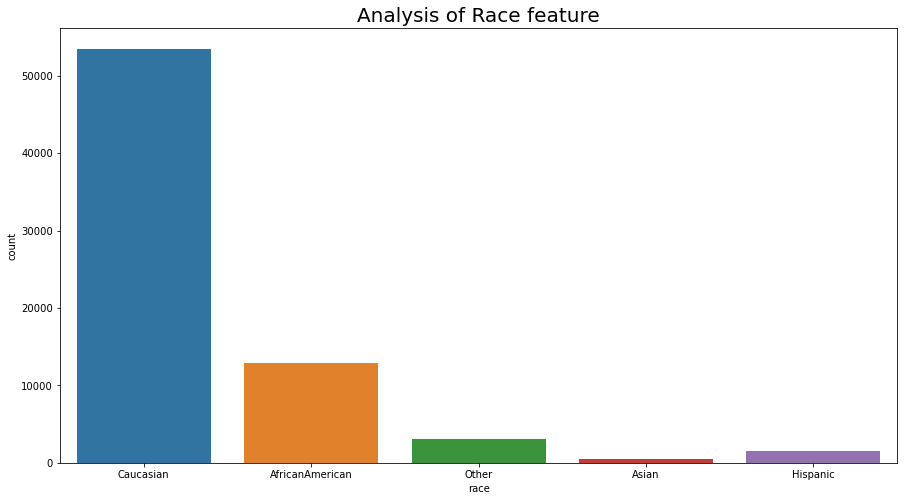

In [31]:
sns.countplot(x=dia['race'])
plt.title('Analysis of Race feature',fontsize=20)
plt.show()

the most number of people who are readmitted are of caucasian race , least number of people are from asian race.

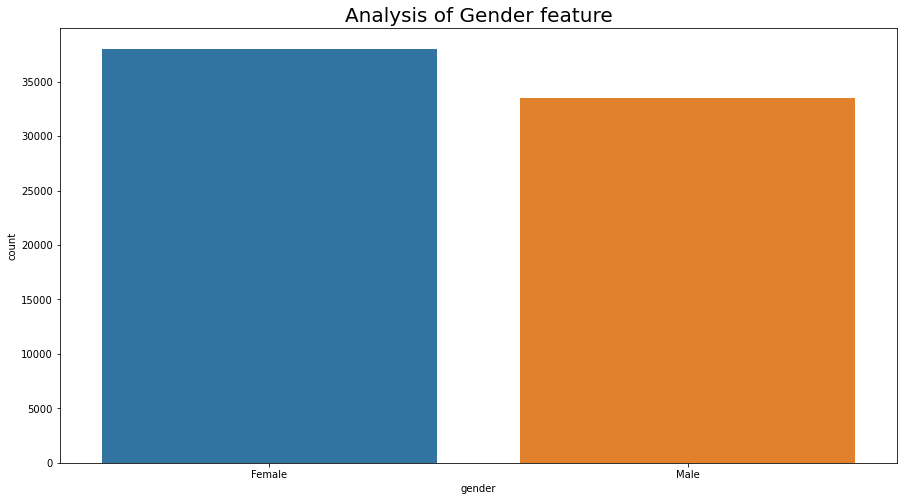

In [32]:
sns.countplot(x=dia['gender'])
plt.title('Analysis of Gender feature',fontsize=20)
plt.show()

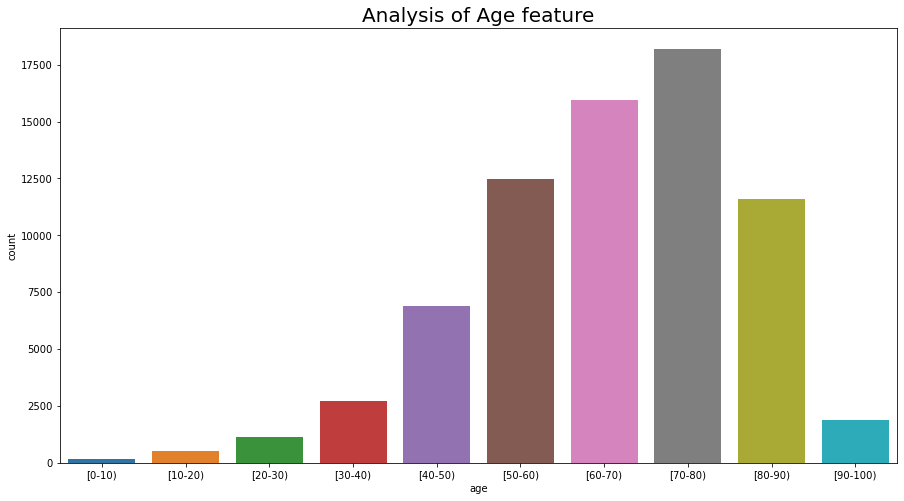

In [33]:
sns.countplot(x=dia['age'])
plt.title('Analysis of Age feature',fontsize=20)
plt.show()

Most number of patients are from the age group of 70 to 80 interval, but we can see that the 90-100 age group have less patient compare the 80-90 , that can show that maybe the datset contain the less number of data is avalable in the dataset.

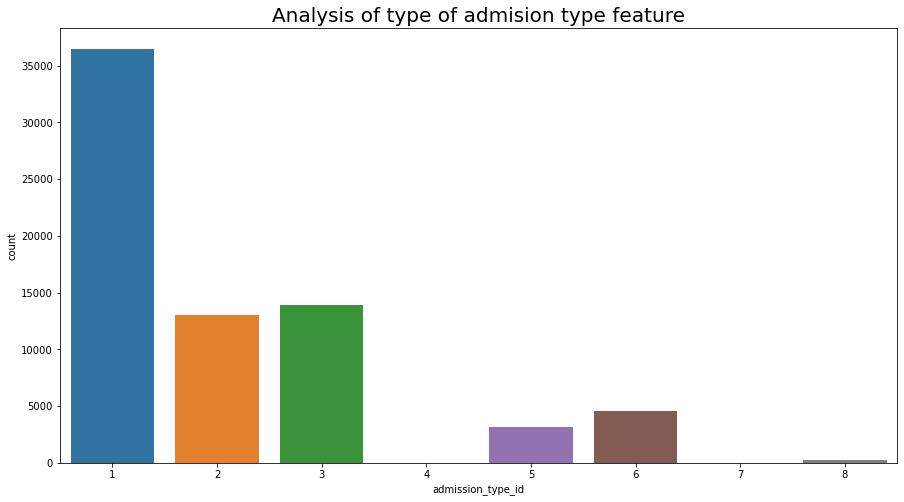

In [34]:
sns.countplot(x=dia['admission_type_id'])
plt.title('Analysis of type of admision type feature',fontsize=20)
plt.show()

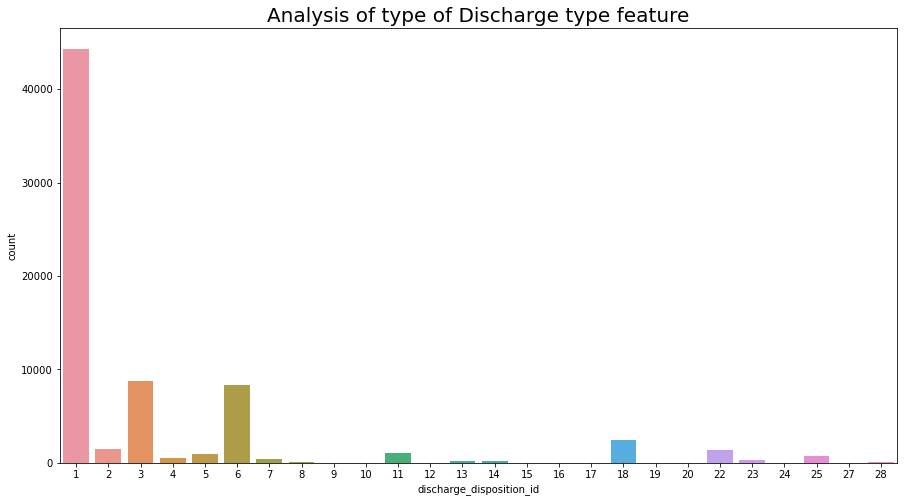

In [35]:
sns.countplot(x=dia['discharge_disposition_id'])
plt.title('Analysis of type of Discharge type feature',fontsize=20)
plt.show()

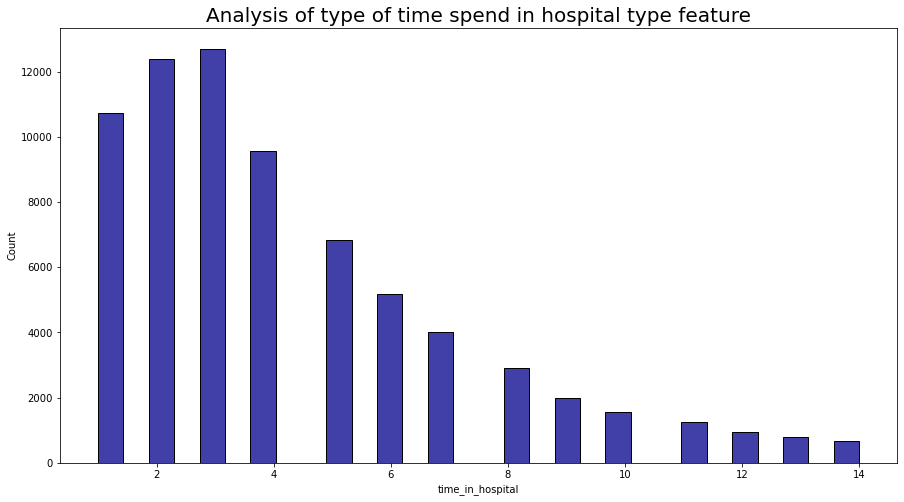

In [36]:
sns.histplot(x=dia['time_in_hospital'],bins=30,color="darkblue")
plt.title('Analysis of type of time spend in hospital type feature',fontsize=20)
plt.show()

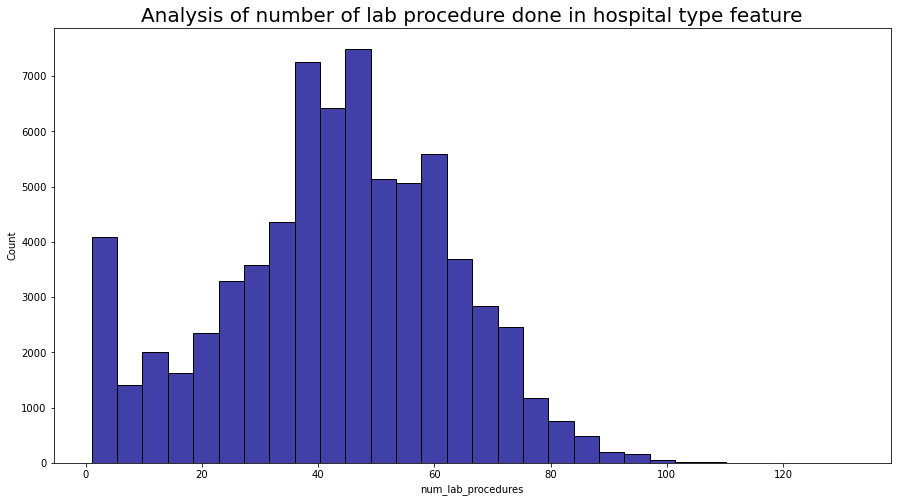

In [37]:
sns.histplot(x=dia['num_lab_procedures'],bins=30,color="darkblue")
plt.title('Analysis of number of lab procedure done in hospital type feature',fontsize=20)
plt.show()

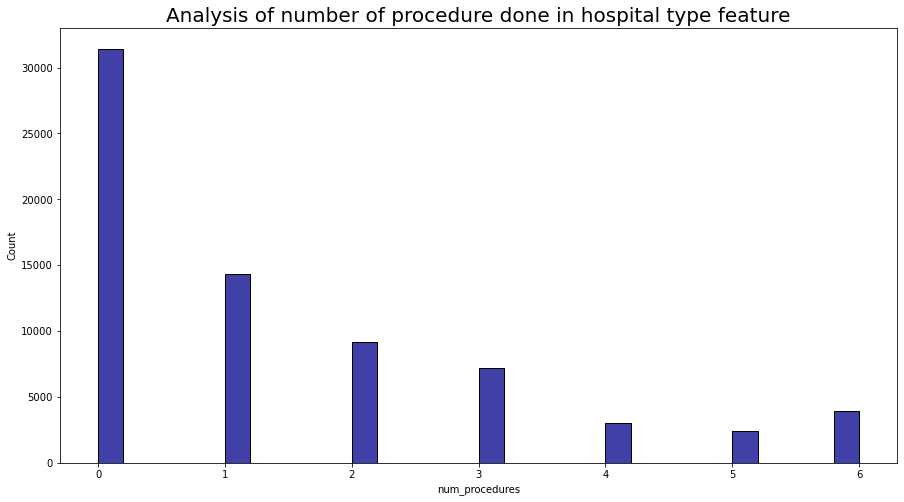

In [38]:
sns.histplot(x=dia['num_procedures'],bins=30,color="darkblue")
plt.title('Analysis of number of procedure done in hospital type feature',fontsize=20)
plt.show()

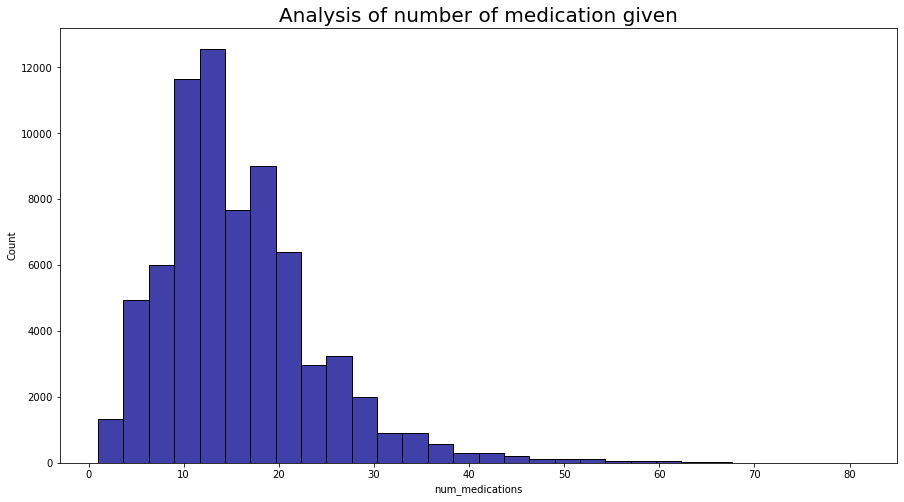

In [39]:
sns.histplot(x=dia['num_medications'],bins=30,color="darkblue")
plt.title('Analysis of number of medication given',fontsize=20)
plt.show()

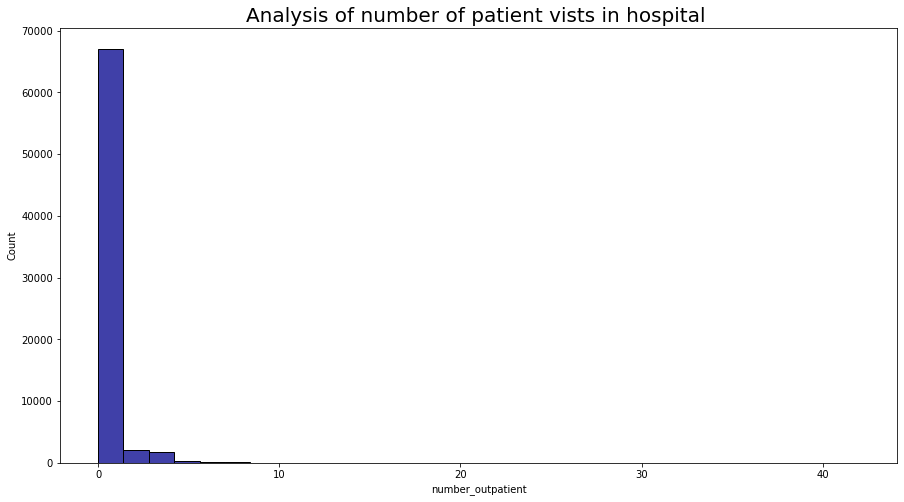

In [40]:
sns.histplot(x=dia['number_outpatient'],bins=30,color="darkblue")
plt.title('Analysis of number of patient vists in hospital ',fontsize=20)
plt.show()

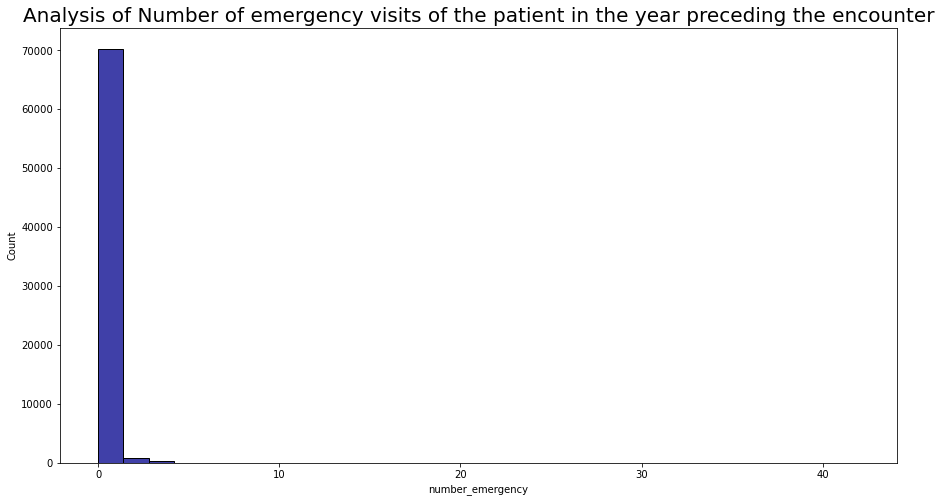

In [41]:
sns.histplot(x=dia['number_emergency'],bins=30,color="darkblue")
plt.title('Analysis of Number of emergency visits of the patient in the year preceding the encounter',fontsize=20)
plt.show()

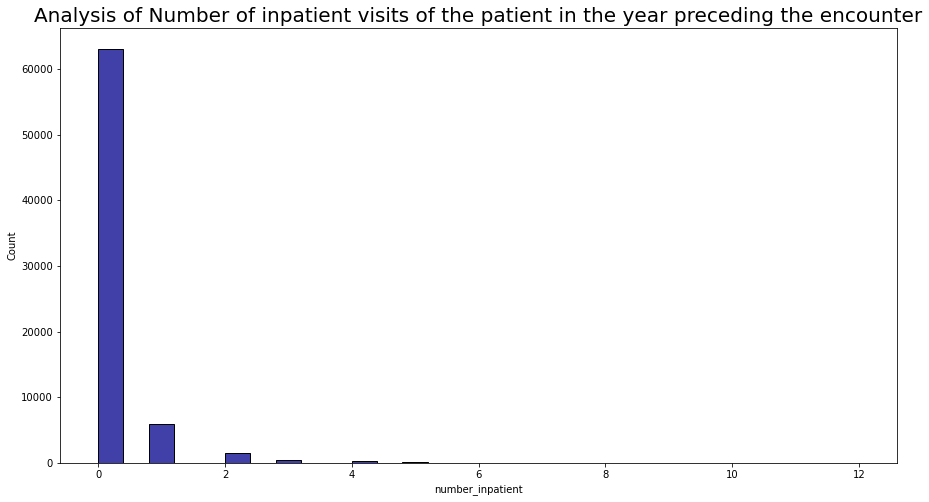

In [42]:
sns.histplot(x=dia['number_inpatient'],bins=30,color="darkblue")
plt.title('Analysis of Number of inpatient visits of the patient in the year preceding the encounter',fontsize=20)
plt.show()

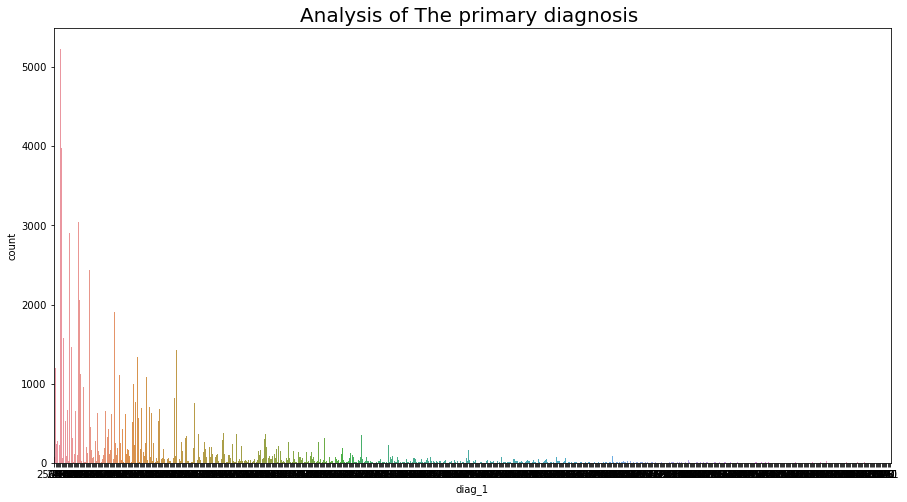

In [43]:
sns.countplot(x=dia['diag_1'])
plt.title('Analysis of The primary diagnosis ',fontsize=20)
plt.show()

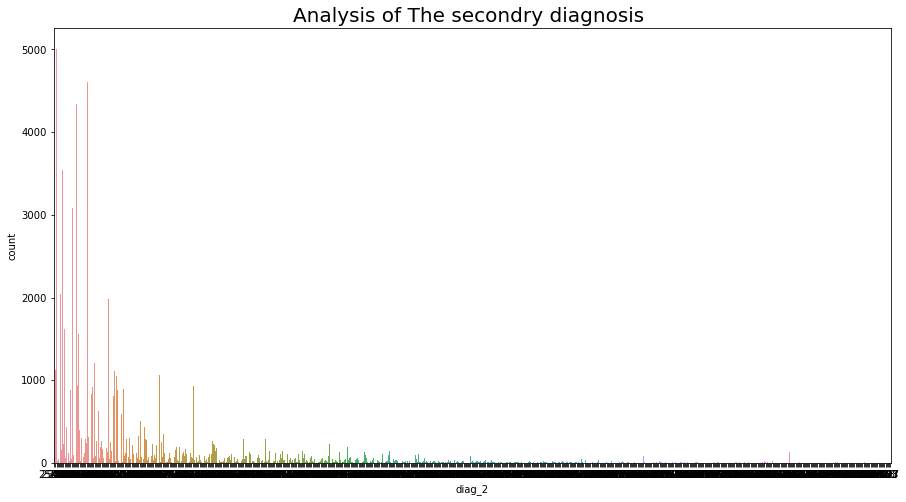

In [44]:
sns.countplot(x=dia['diag_2'])
plt.title('Analysis of The secondry diagnosis ',fontsize=20)
plt.show()

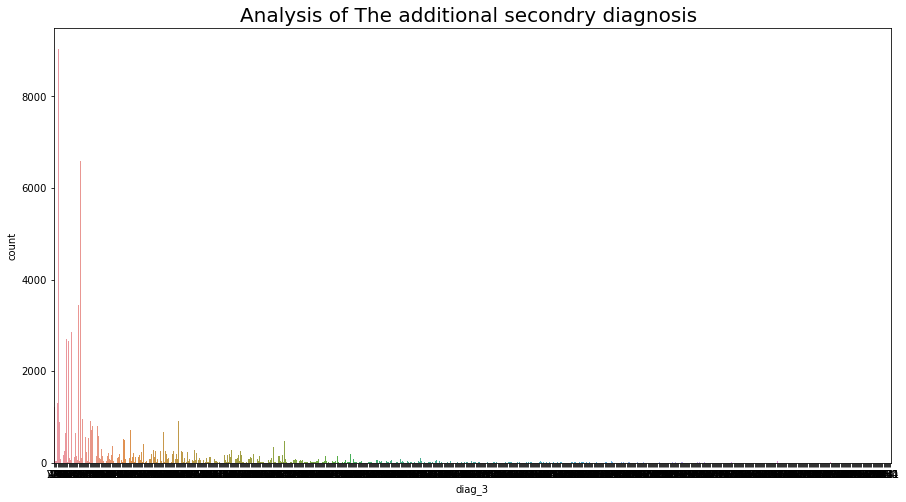

In [45]:
sns.countplot(x=dia['diag_3'])
plt.title('Analysis of The additional secondry diagnosis ',fontsize=20)
plt.show()

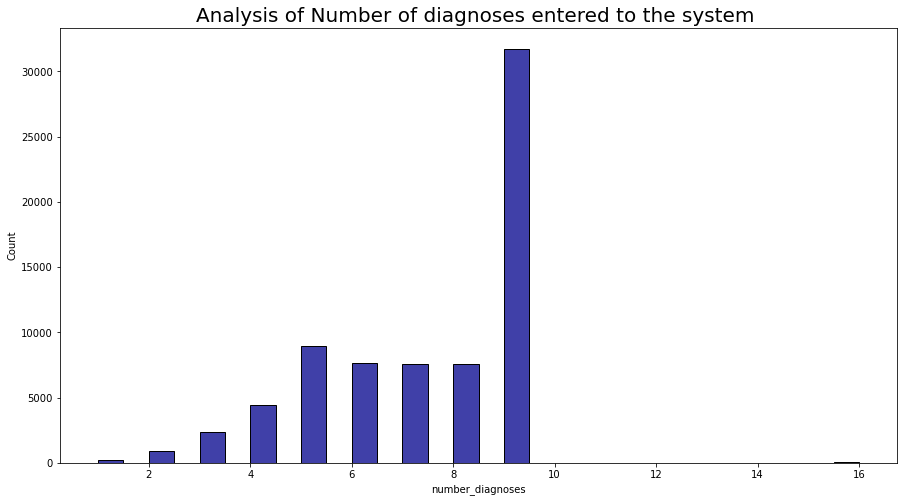

In [46]:
sns.histplot(x=dia['number_diagnoses'],bins=30,color="darkblue")
plt.title('Analysis of Number of diagnoses entered to the system ',fontsize=20)
plt.show()

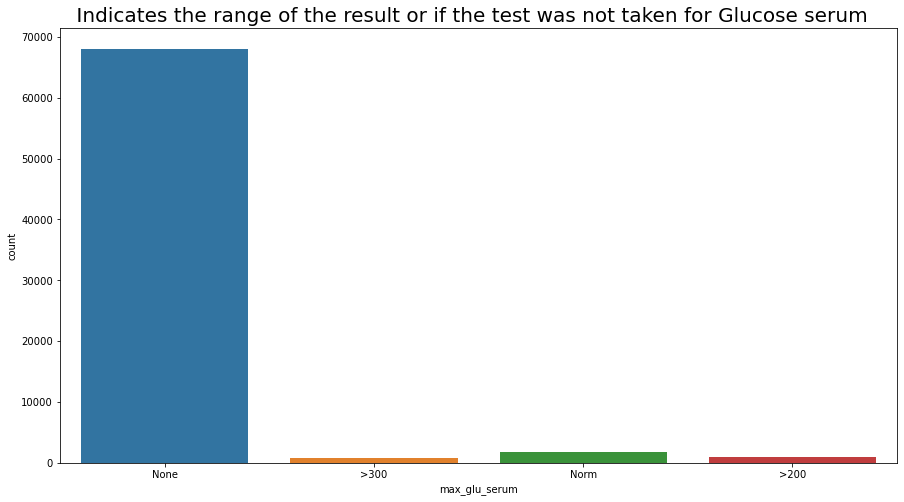

In [47]:
sns.countplot(x=dia.max_glu_serum)
plt.title(' Indicates the range of the result or if the test was not taken for Glucose serum   ',fontsize=20)

plt.show()

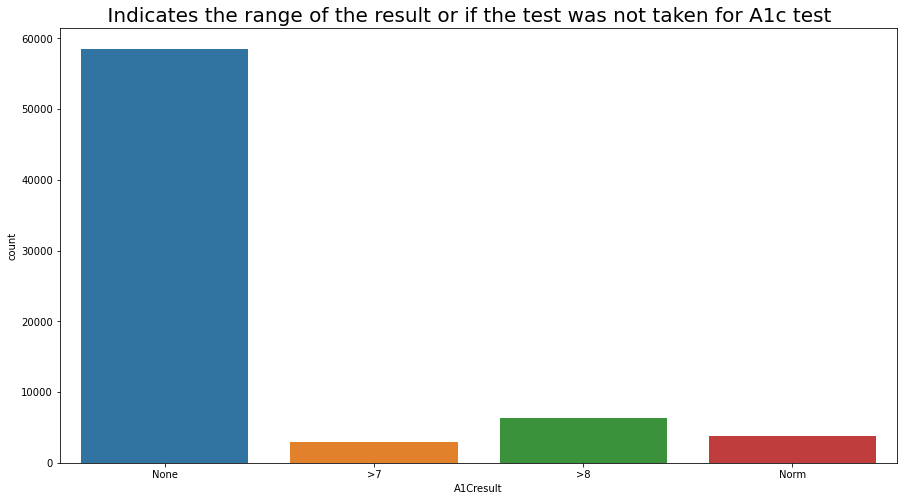

In [48]:
sns.countplot(x=dia['A1Cresult'])
plt.title(' Indicates the range of the result or if the test was not taken for A1c test    ',fontsize=20)
plt.show()

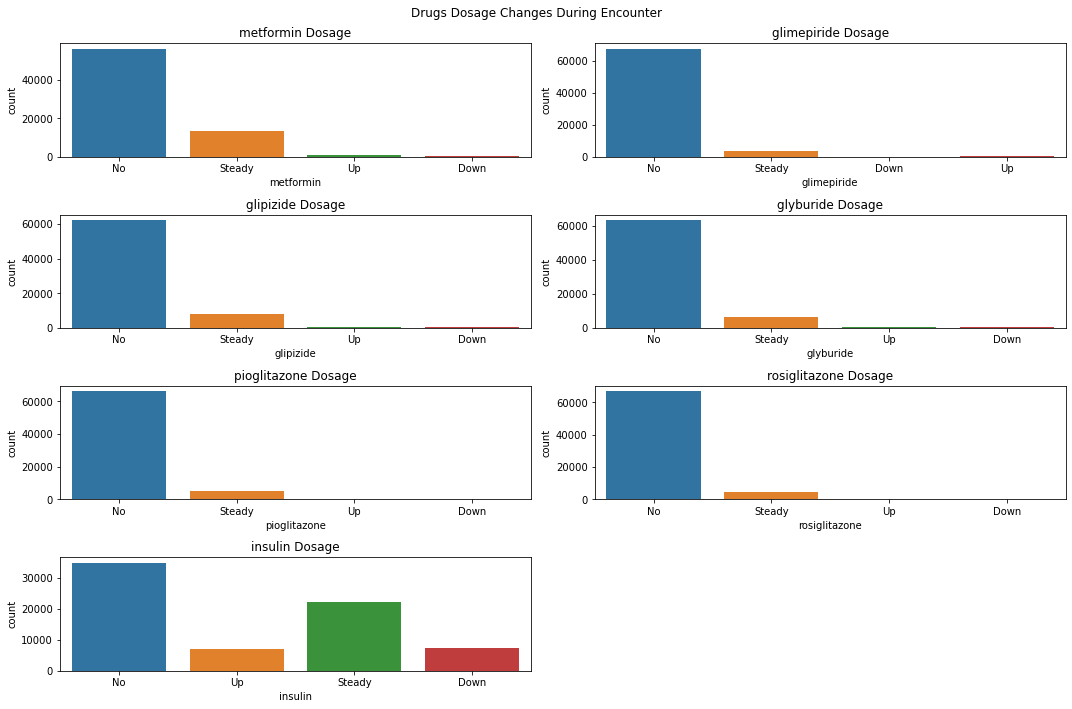

In [49]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)

sns.countplot(x=dia['metformin'], ax=ax1)
ax1.set_title('metformin Dosage')
sns.countplot(x=dia['glimepiride'], ax=ax2)
ax2.set_title('glimepiride Dosage')
sns.countplot(x=dia['glipizide'], ax=ax3)
ax3.set_title('glipizide Dosage')
sns.countplot(x=dia['glyburide'], ax=ax4)
ax4.set_title('glyburide Dosage')
sns.countplot(x=dia['pioglitazone'], ax=ax5)
ax5.set_title('pioglitazone Dosage')
sns.countplot(x=dia['rosiglitazone'], ax=ax6)
ax6.set_title('rosiglitazone Dosage')
sns.countplot(x=dia['insulin'], ax=ax7)
ax7.set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')


plt.tight_layout()
plt.show()

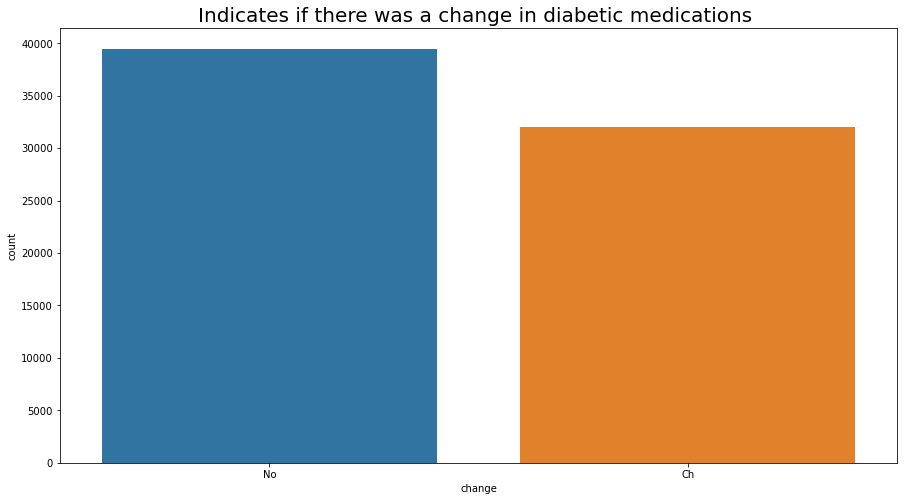

In [50]:
sns.countplot(x=dia['change'])
plt.title('Indicates if there was a change in diabetic medications ',fontsize=20)
plt.show()

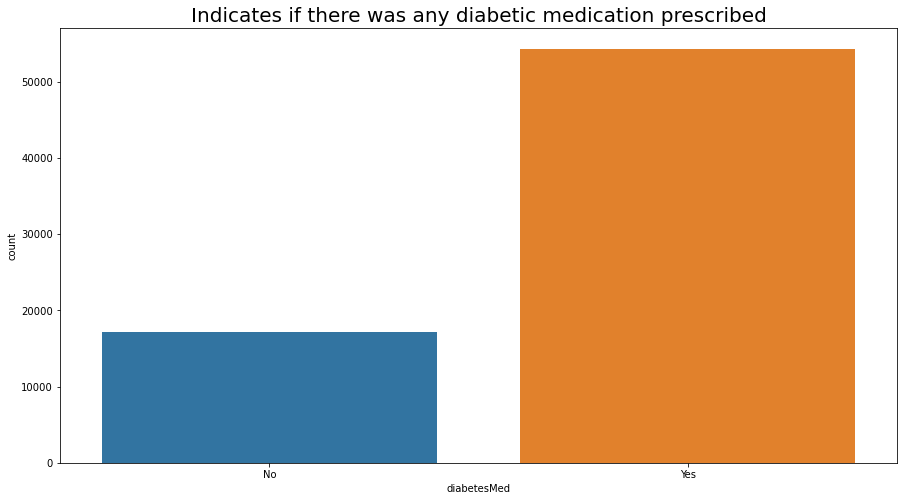

In [51]:
sns.countplot(x=dia['diabetesMed'])
plt.title('Indicates if there was any diabetic medication prescribed',fontsize=20)
plt.show()

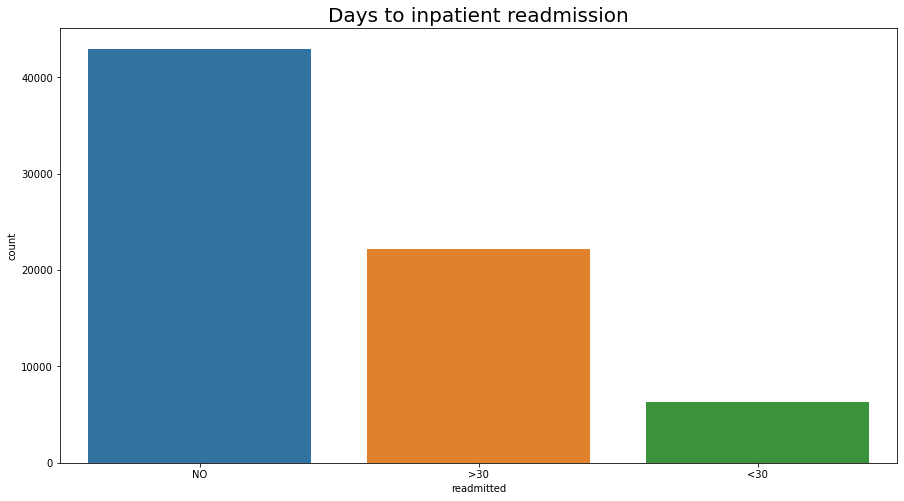

In [52]:
sns.countplot(x=dia['readmitted'])
plt.title('Days to inpatient readmission',fontsize=20)
plt.show()

# Bivariate Analysis

### Time in hospital

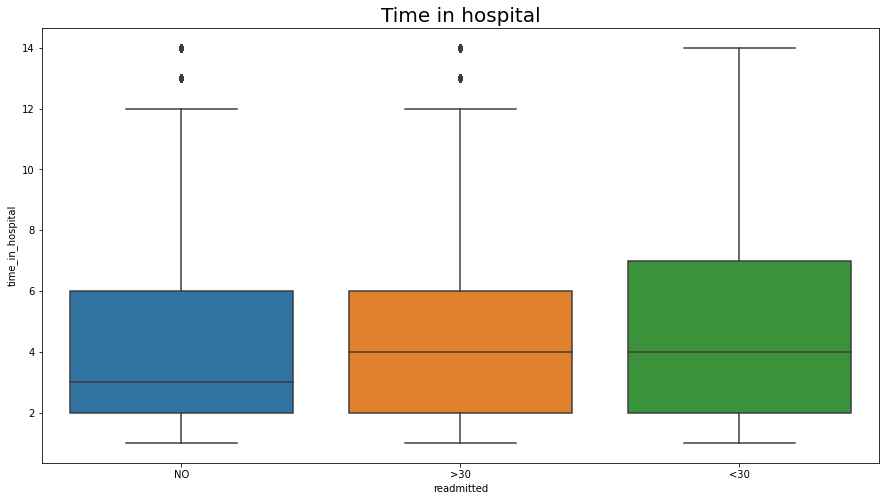

In [53]:
sns.boxplot(y='time_in_hospital',x='readmitted',data=dia)
plt.title('Time in hospital',fontsize=20)
plt.show()

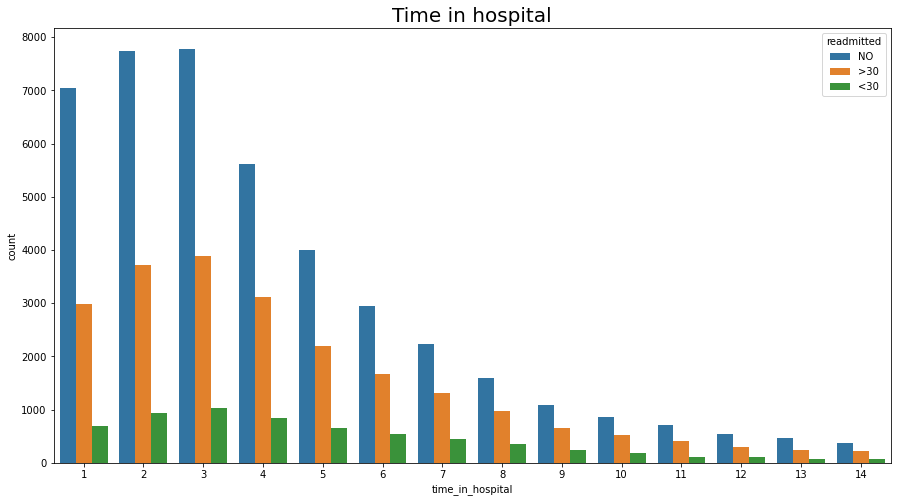

In [54]:
sns.countplot(x='time_in_hospital',hue='readmitted',data=dia)
plt.title('Time in hospital',fontsize=20)
plt.show()

### Number of lab procedures

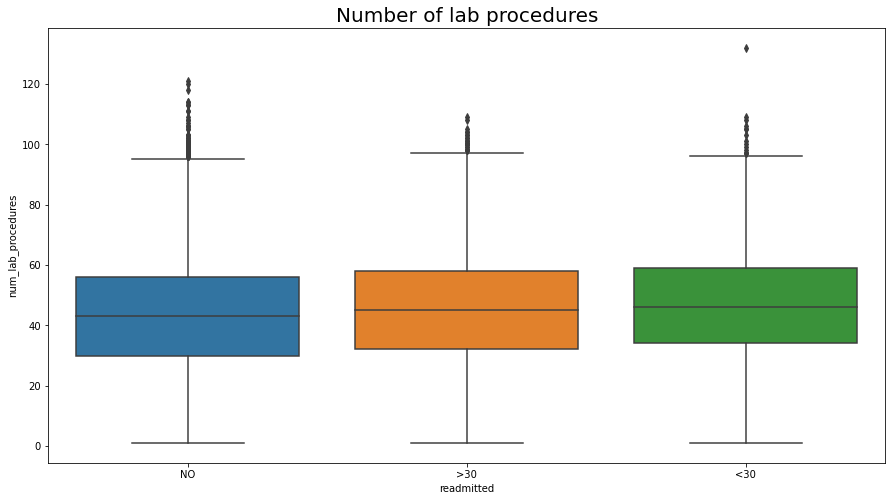

In [55]:
sns.boxplot(y='num_lab_procedures',x='readmitted',data=dia)
plt.title('Number of lab procedures',fontsize=20)
plt.show()

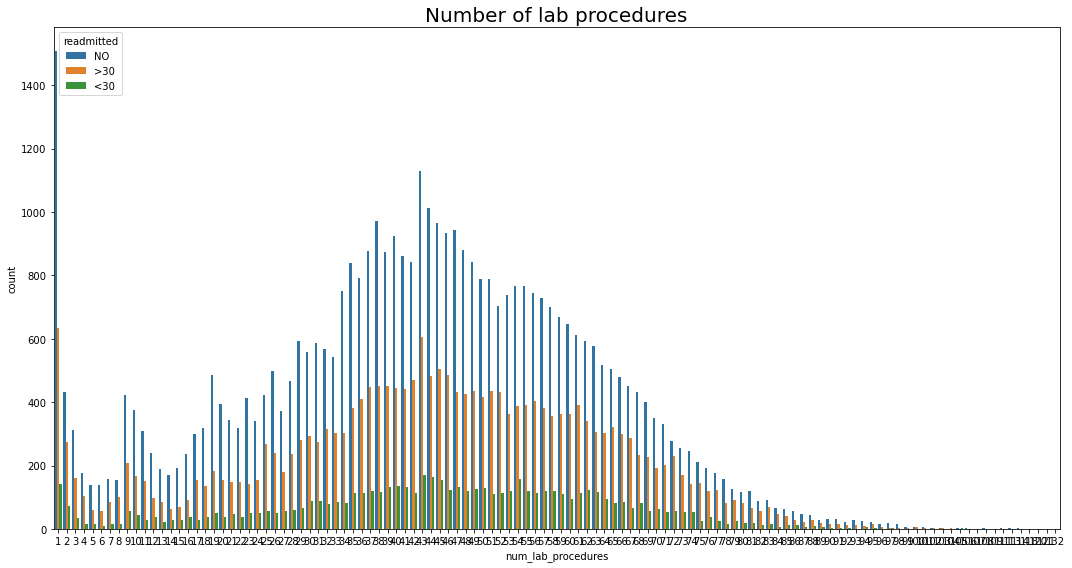

In [56]:
sns.countplot(x='num_lab_procedures',hue='readmitted',data=dia)
plt.title('Number of lab procedures',fontsize=20)
plt.tight_layout()
plt.show()

### Number procedures other than lab

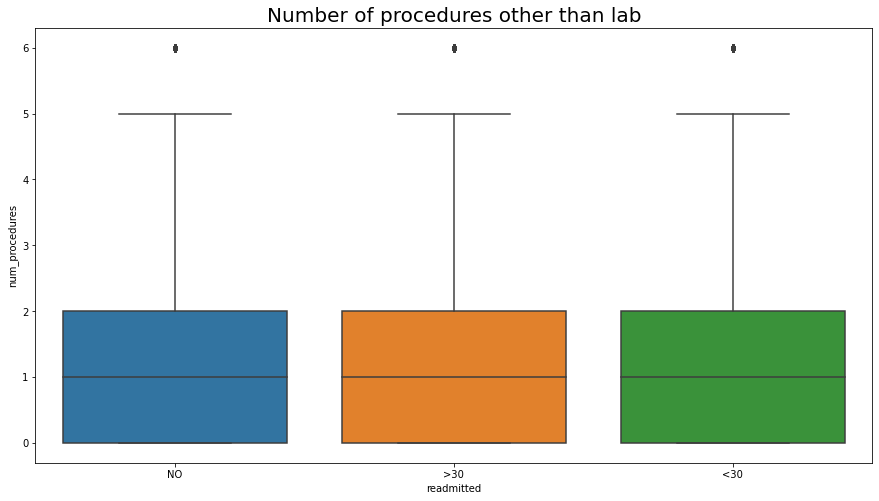

In [57]:

sns.boxplot(y='num_procedures',x='readmitted',data=dia)
plt.title('Number of procedures other than lab',fontsize=20)
plt.show()

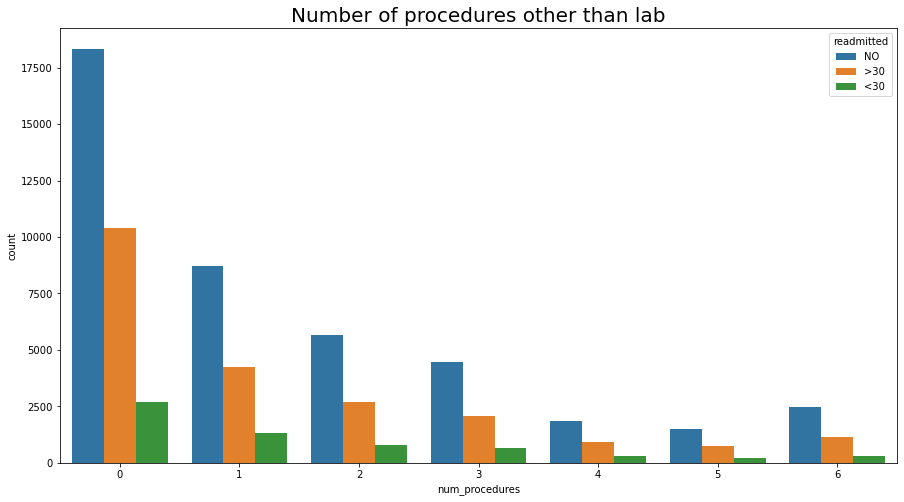

In [58]:
sns.countplot(x='num_procedures',hue='readmitted',data=dia)
plt.title('Number of procedures other than lab',fontsize=20)
plt.show()

### Number of medications

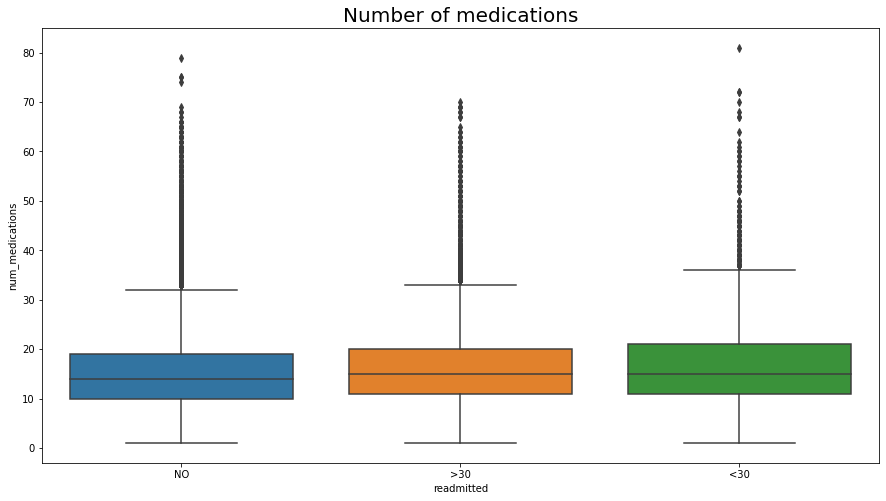

In [59]:

sns.boxplot(y='num_medications',x='readmitted',data=dia)
plt.title('Number of medications',fontsize=20)
plt.show()

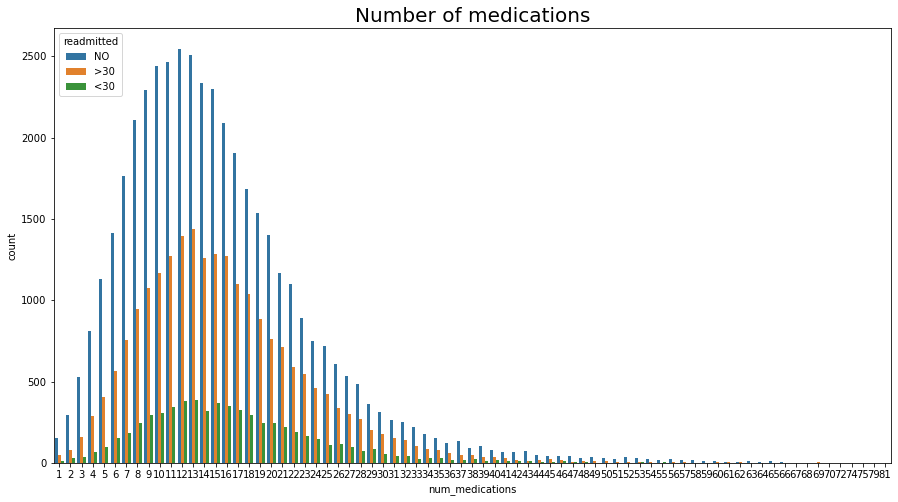

In [60]:
sns.countplot(x='num_medications',hue='readmitted',data=dia)
plt.title('Number of medications',fontsize=20)
plt.show()

### Number of emergency visits

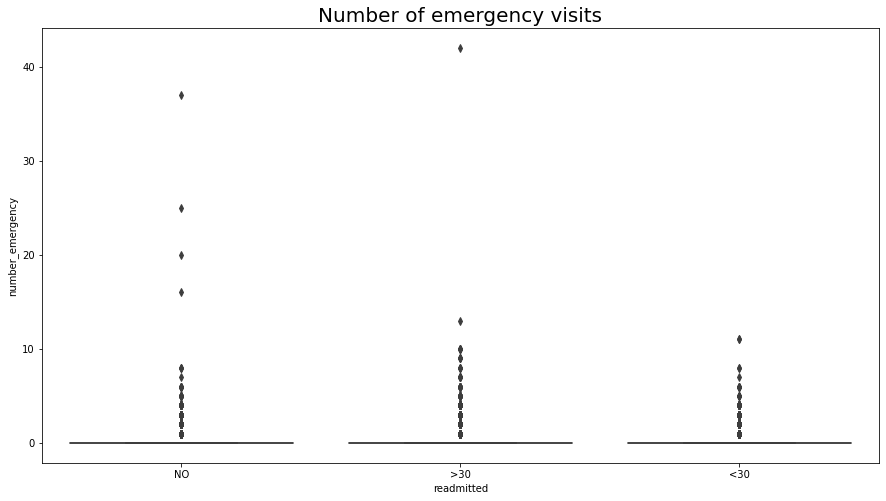

In [61]:
sns.boxplot(y='number_emergency',x='readmitted',data=dia)
plt.title('Number of emergency visits',fontsize=20)
plt.show()

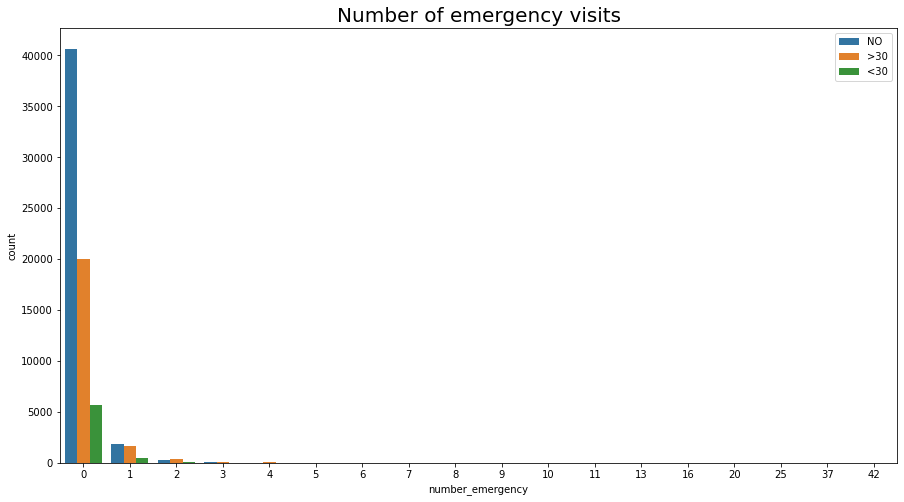

In [62]:
sns.countplot(x='number_emergency',hue='readmitted',data=dia)
plt.title('Number of emergency visits',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Number of inpatient visits


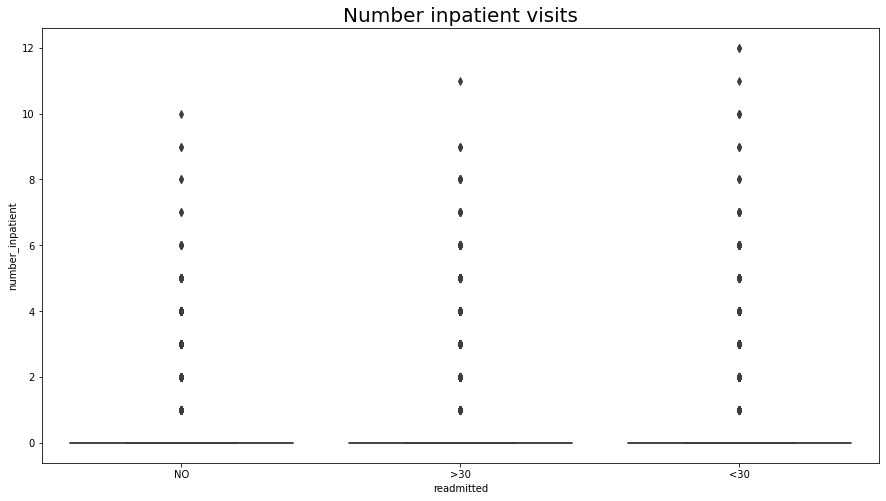

In [63]:
sns.boxplot(y='number_inpatient',x='readmitted',data=dia)
plt.title('Number inpatient visits',fontsize=20)
plt.show()

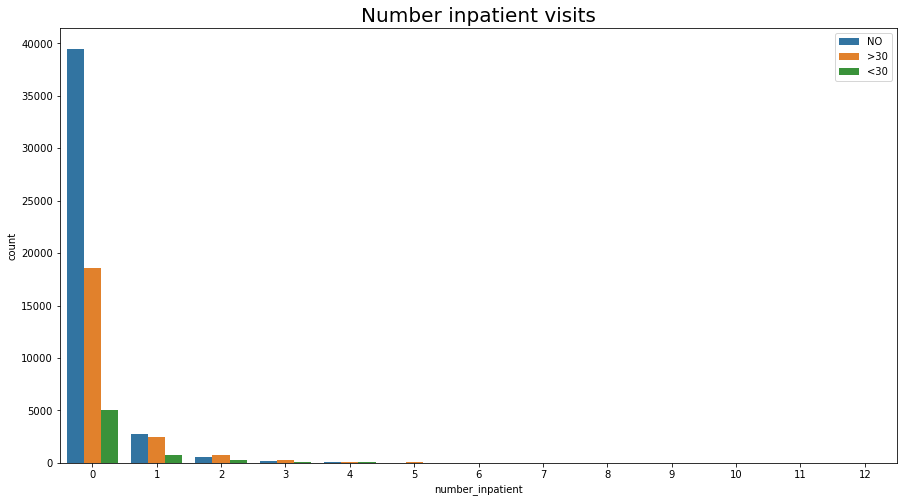

In [64]:
sns.countplot(x='number_inpatient',hue='readmitted',data=dia)
plt.title('Number inpatient visits',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Number of outpatient

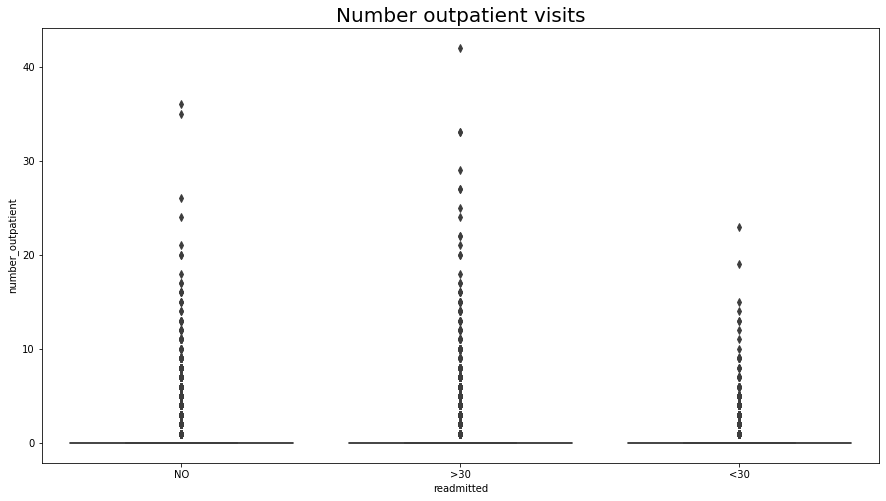

In [65]:
sns.boxplot(y='number_outpatient',x='readmitted',data=dia)
plt.title('Number outpatient visits',fontsize=20)
plt.show()

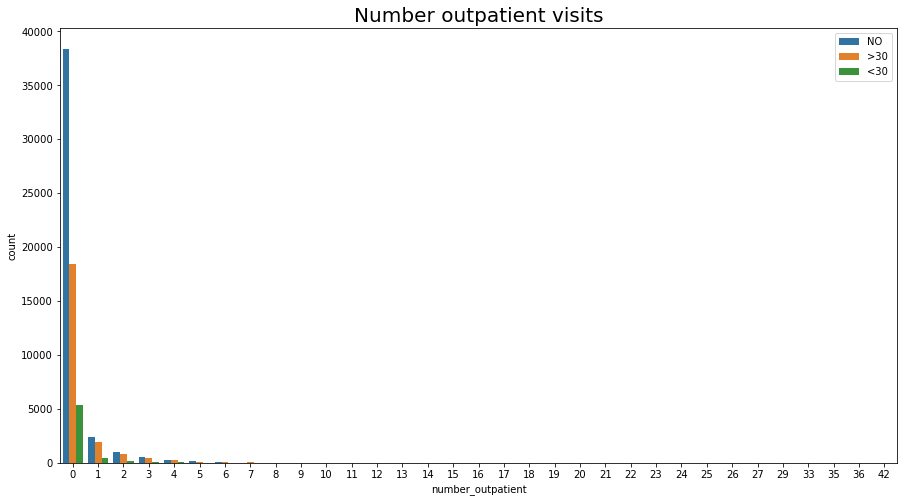

In [66]:
sns.countplot(x='number_outpatient',hue='readmitted',data=dia)
plt.title('Number outpatient visits',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Number of dignoses entered in system

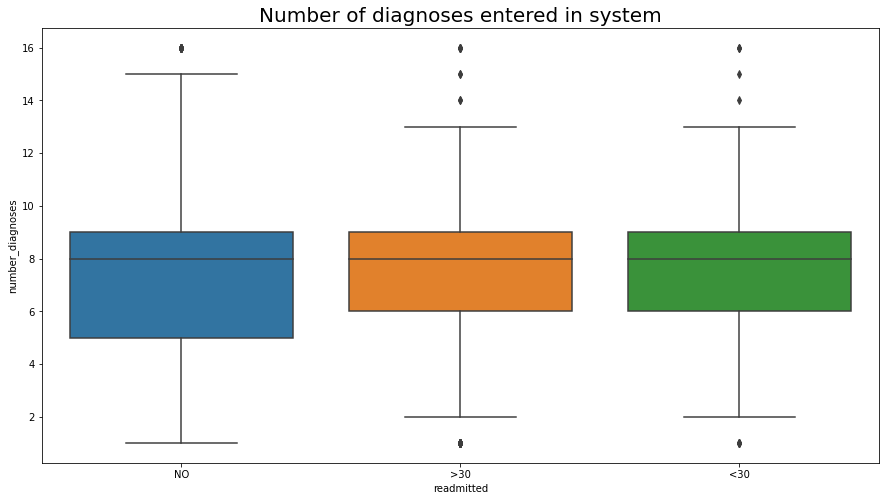

In [67]:
sns.boxplot(y='number_diagnoses',x='readmitted',data=dia)
plt.title('Number of diagnoses entered in system',fontsize=20)
plt.show()

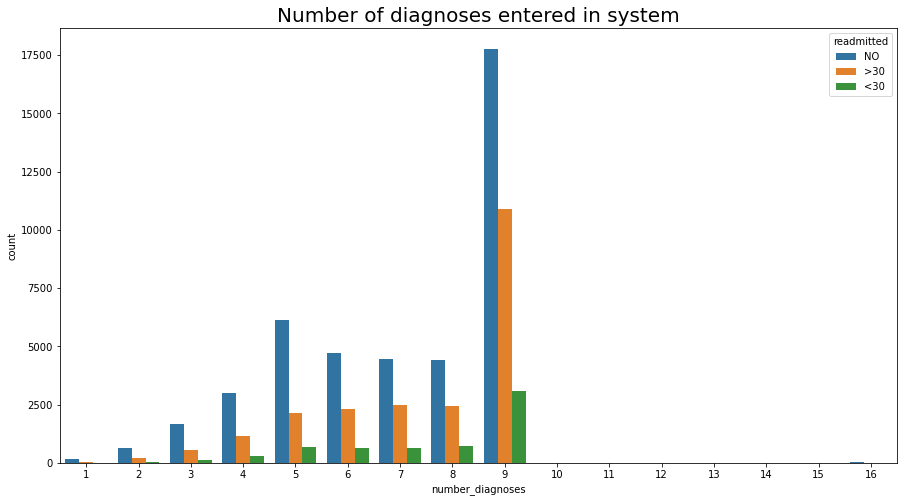

In [68]:
sns.countplot(x='number_diagnoses',hue='readmitted',data=dia)
plt.title('Number of diagnoses entered in system',fontsize=20)
plt.show()

### Analysis of the feature Change and our target feature.

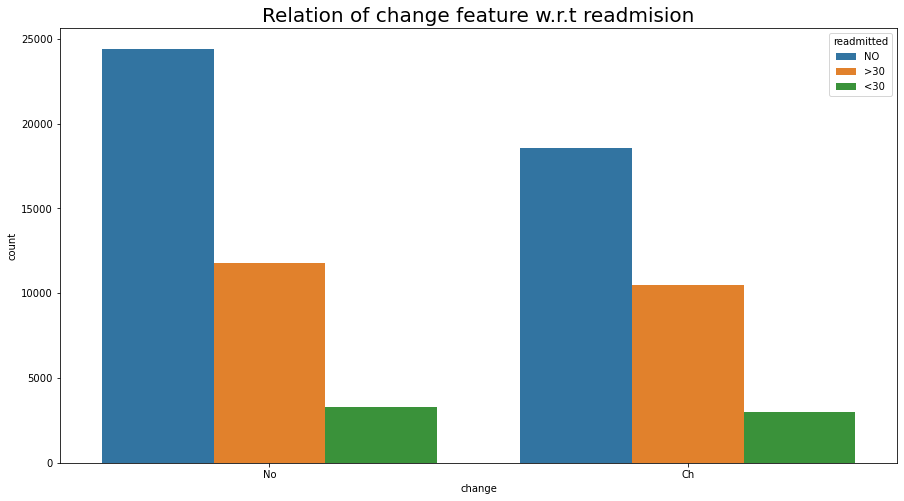

In [69]:
sns.countplot(x=dia['change'],hue=dia['readmitted'])
plt.title('Relation of change feature w.r.t readmision', fontsize=20)
plt.show()

### Analysis of the feature Diabetic medication and our target feature.

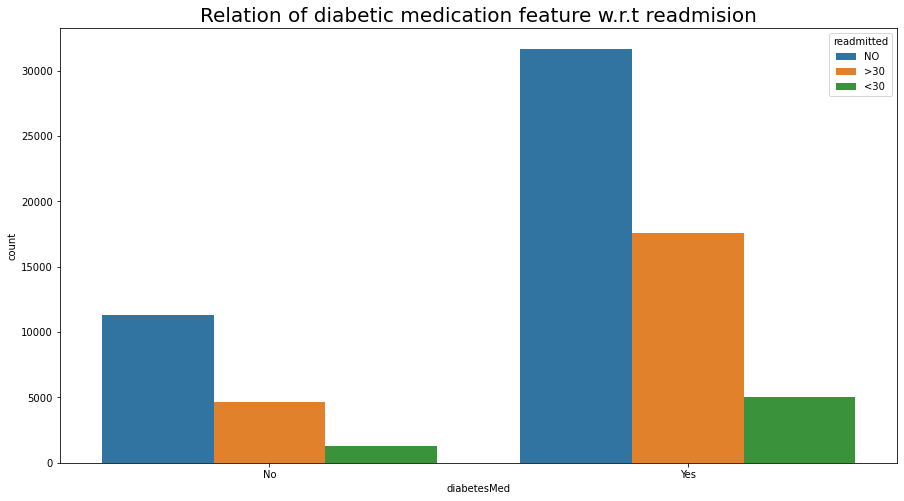

In [70]:
sns.countplot(x=dia['diabetesMed'],hue=dia['readmitted'])
plt.title('Relation of diabetic medication feature w.r.t readmision', fontsize=20)
plt.show()

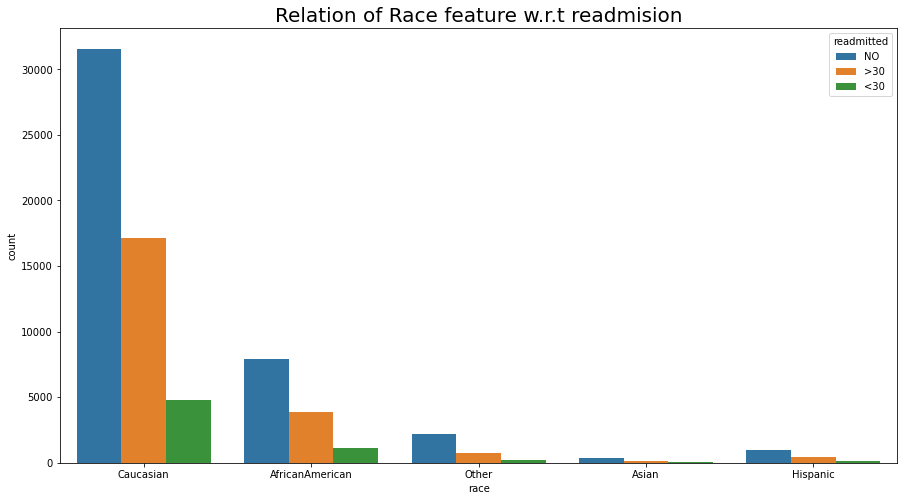

In [71]:
sns.countplot(x='race',hue='readmitted',data=dia)
plt.title('Relation of Race feature w.r.t readmision',fontsize=20)
plt.show()

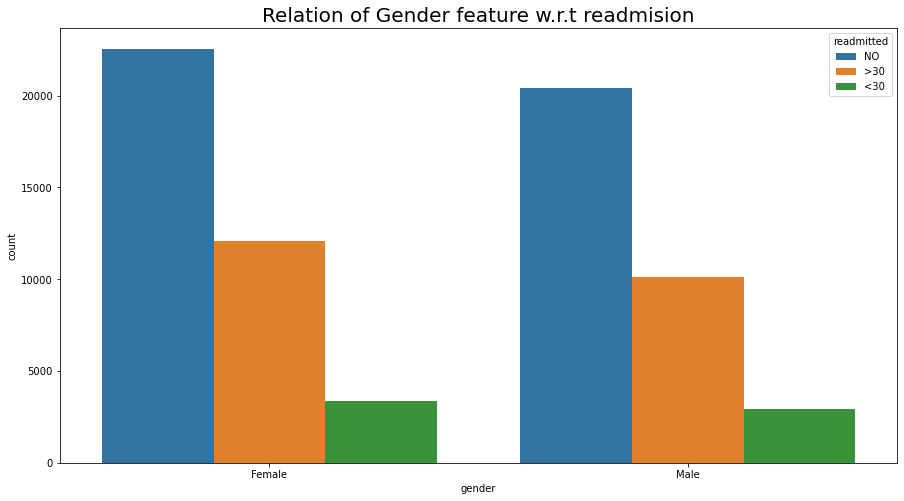

In [72]:
sns.countplot(x='gender',hue='readmitted',data=dia)
plt.title('Relation of Gender feature w.r.t readmision',fontsize=20)
plt.show()

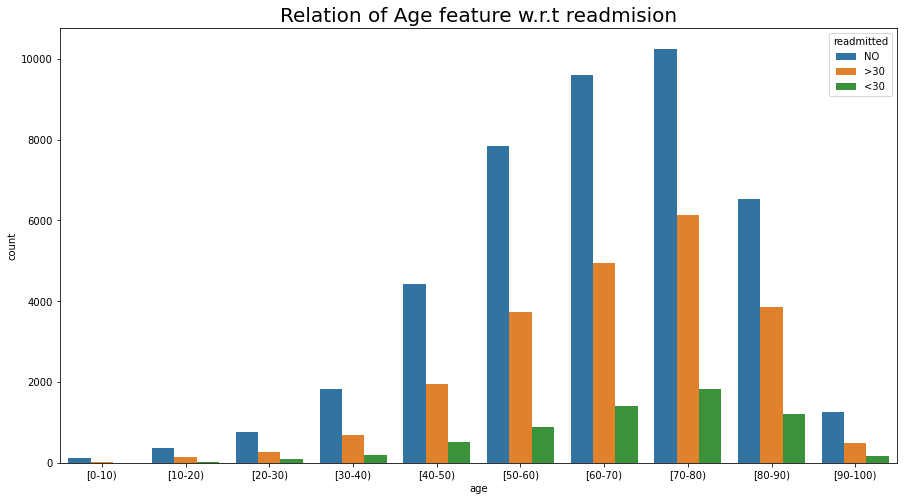

In [73]:
sns.countplot(x='age',hue='readmitted',data=dia)
plt.title('Relation of Age feature w.r.t readmision',fontsize=20)
plt.show()

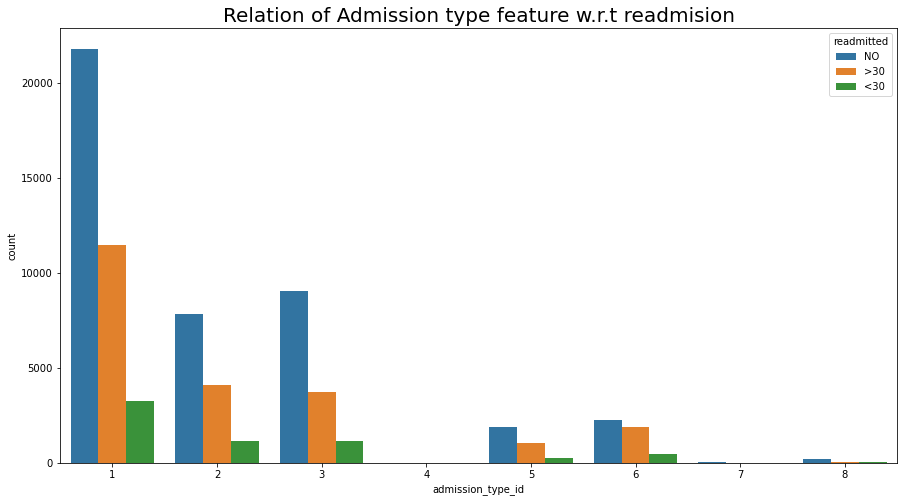

In [74]:
sns.countplot(x='admission_type_id',hue='readmitted',data=dia)
plt.title('Relation of Admission type feature w.r.t readmision',fontsize=20)
plt.show()

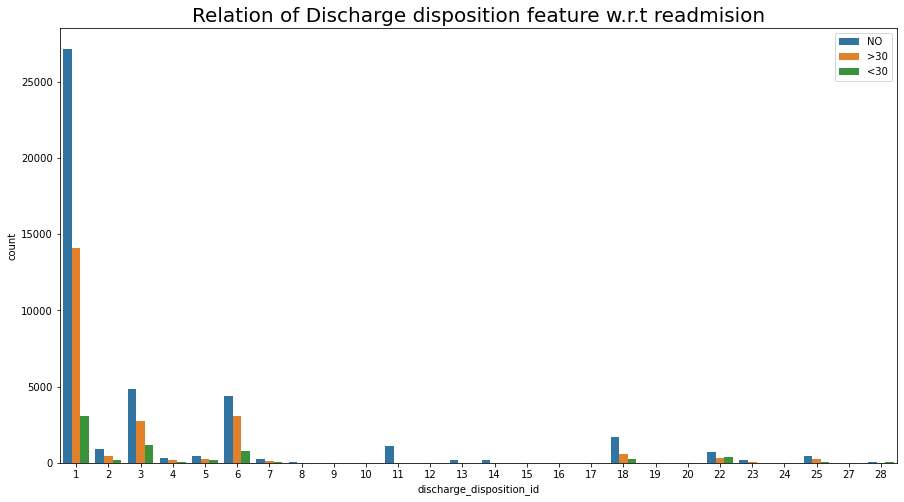

In [75]:
sns.countplot(x='discharge_disposition_id',hue='readmitted',data=dia)
plt.title('Relation of Discharge disposition feature w.r.t readmision',fontsize=20)
plt.legend(loc='upper right')
plt.show()

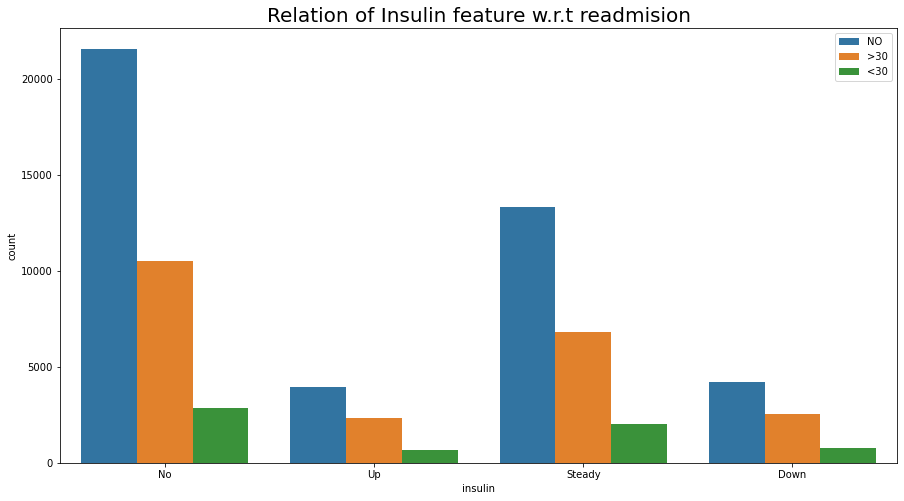

In [76]:
sns.countplot(x='insulin',hue='readmitted',data=dia)
plt.title('Relation of Insulin feature w.r.t readmision',fontsize=20)
plt.legend(loc='upper right')
plt.show()

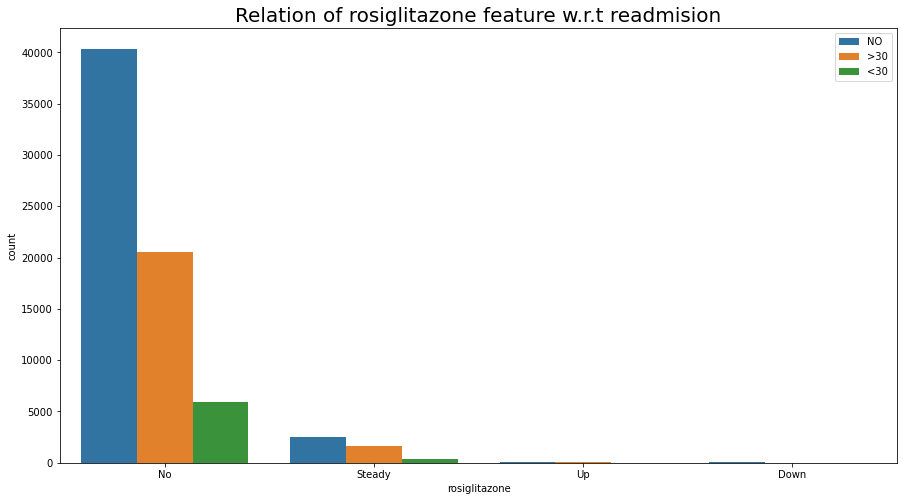

In [77]:
sns.countplot(x='rosiglitazone',hue='readmitted',data=dia)
plt.title('Relation of rosiglitazone feature w.r.t readmision',fontsize=20)
plt.legend(loc='upper right')
plt.show()

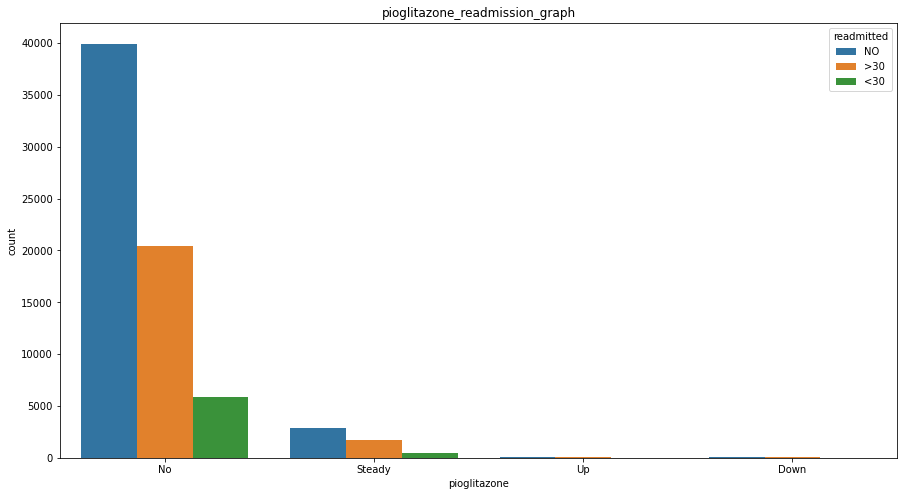

In [78]:
sns.countplot(x='pioglitazone',hue='readmitted',data=dia)
plt.title('pioglitazone_readmission_graph')
plt.show()

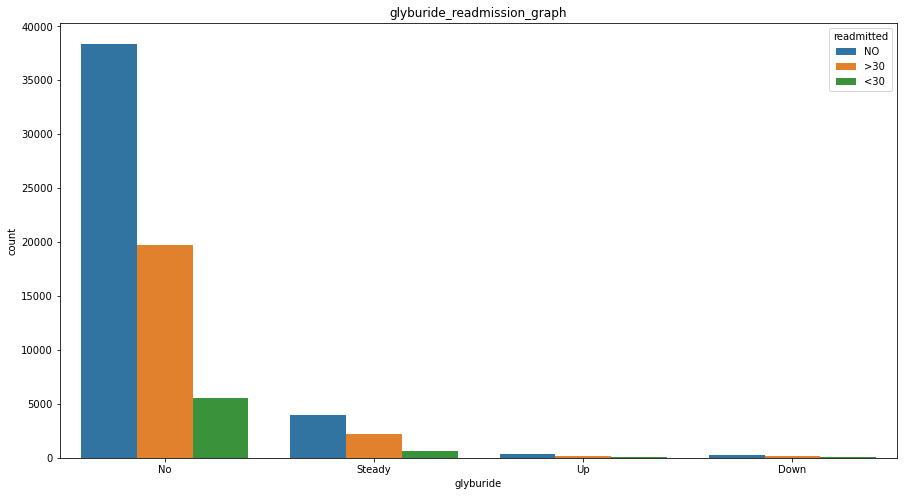

In [79]:
sns.countplot(x='glyburide',hue='readmitted',data=dia)
plt.title('glyburide_readmission_graph')
plt.show()

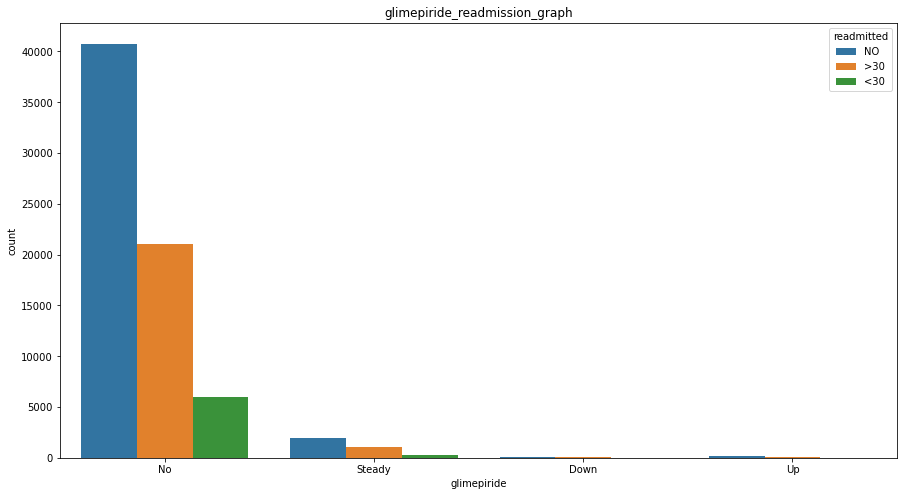

In [80]:
sns.countplot(x='glimepiride',hue='readmitted',data=dia)
plt.title('glimepiride_readmission_graph')
plt.show()

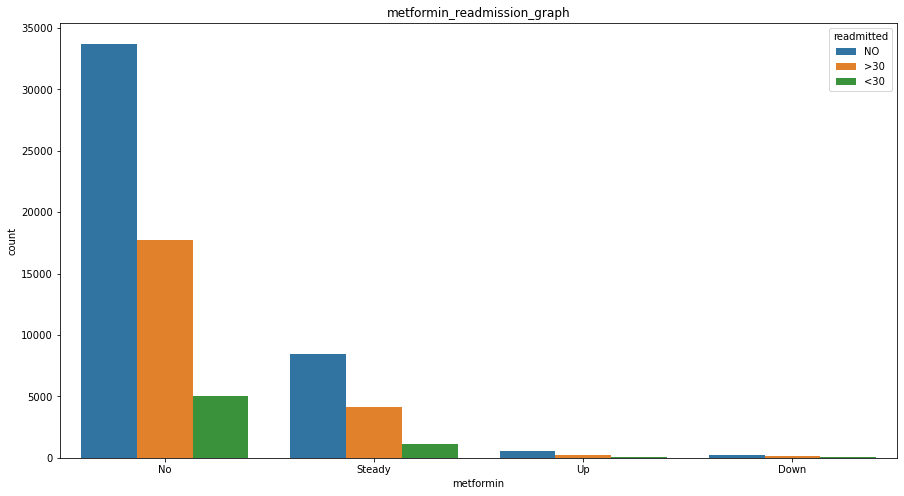

In [81]:
sns.countplot(x='metformin',hue='readmitted',data=dia)
plt.title('metformin_readmission_graph')
plt.show()

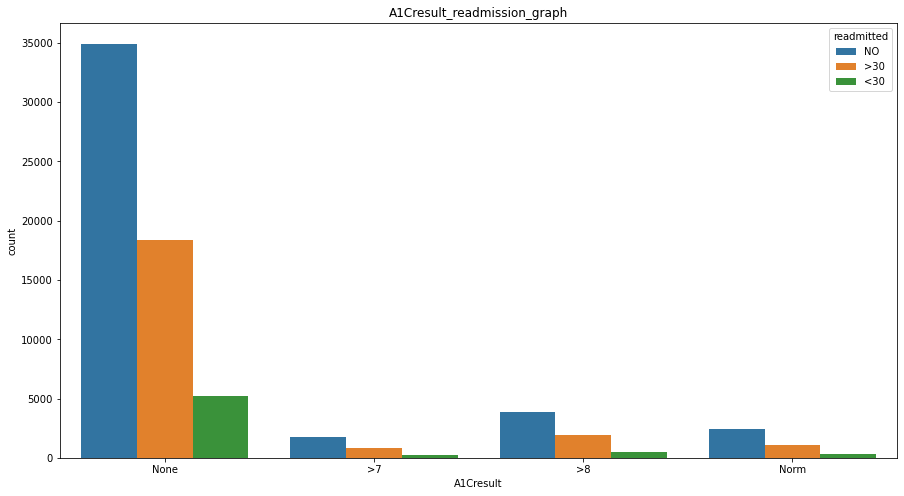

In [82]:
sns.countplot(x='A1Cresult',hue='readmitted',data=dia)
plt.title('A1Cresult_readmission_graph')
plt.show()

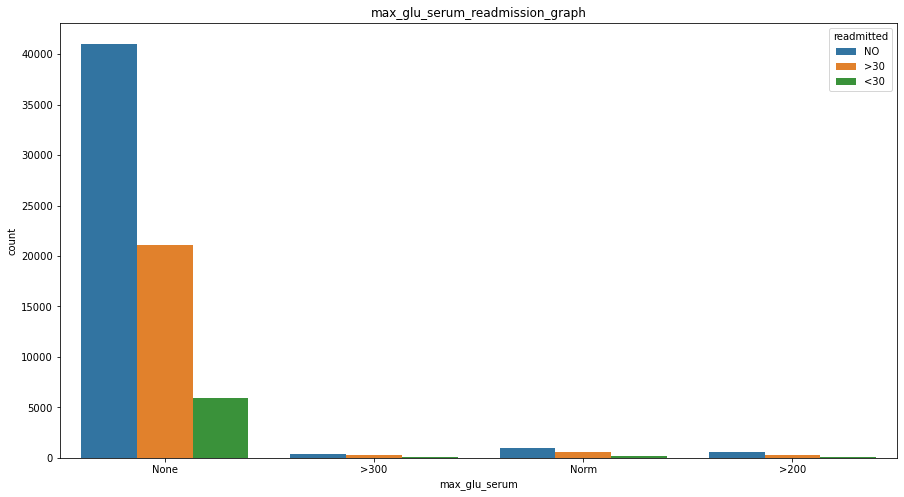

In [83]:
sns.countplot(x='max_glu_serum',hue='readmitted',data=dia)
plt.title('max_glu_serum_readmission_graph')
plt.show()

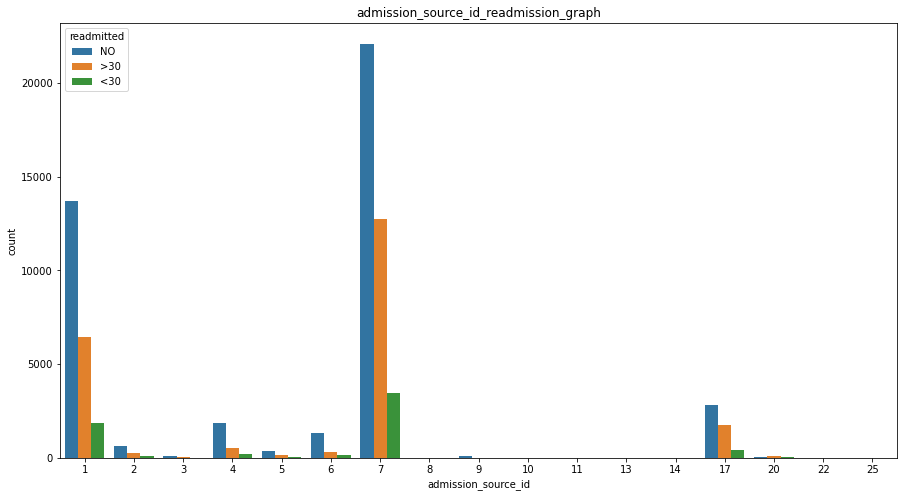

In [84]:
sns.countplot(x='admission_source_id',hue='readmitted',data=dia)
plt.title('admission_source_id_readmission_graph')
plt.show()

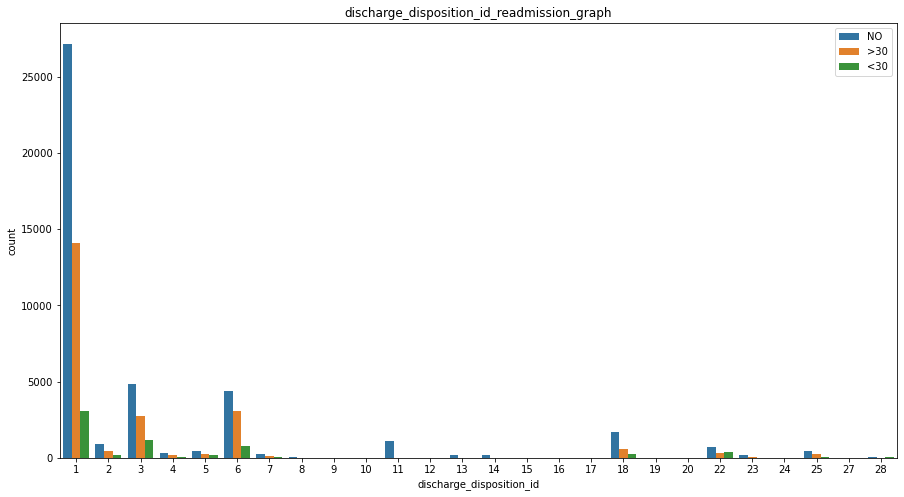

In [85]:
sns.countplot(x='discharge_disposition_id',hue='readmitted',data=dia)
plt.title('discharge_disposition_id_readmission_graph')
plt.legend(loc='upper right')
plt.show()

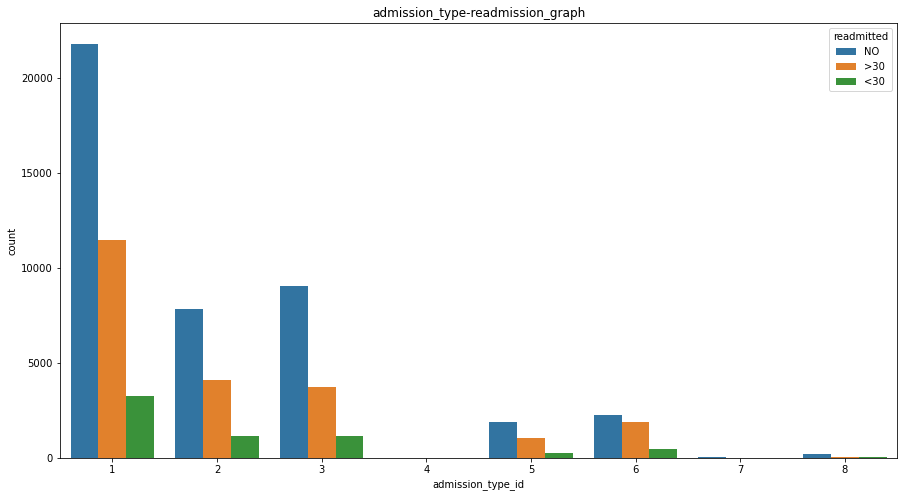

In [86]:
sns.countplot(x='admission_type_id',hue='readmitted',data=dia)
plt.title('admission_type-readmission_graph')
plt.show()

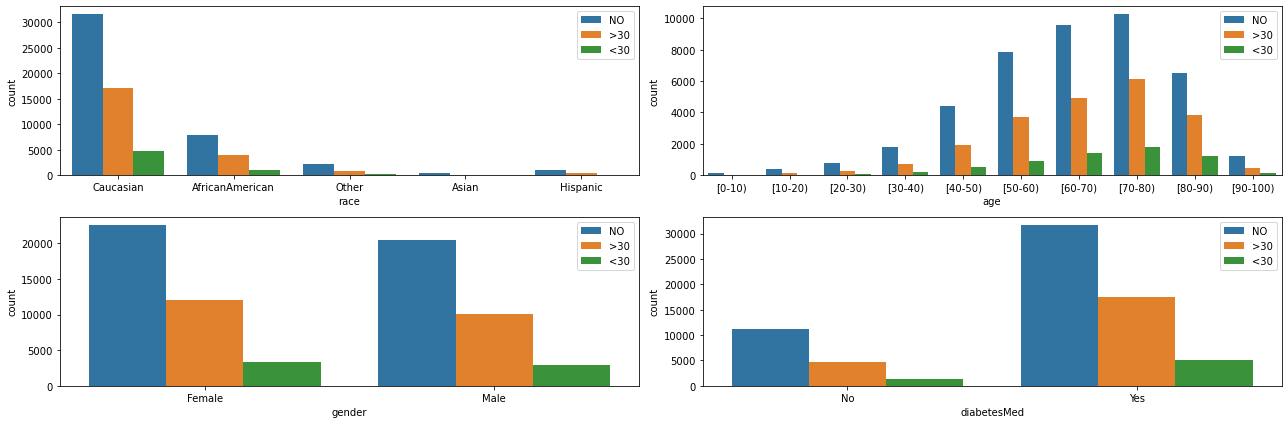

In [87]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
sns.countplot(data=dia, x='race', hue='readmitted',ax=ax1)

sns.countplot(data=dia, x='age', hue='readmitted',ax=ax2)

sns.countplot(data=dia, x='gender', hue='readmitted',ax=ax3)

sns.countplot(data=dia, x='diabetesMed', hue='readmitted',ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()
# readmitted: 0 = No, 1 = >30, 2 = <30

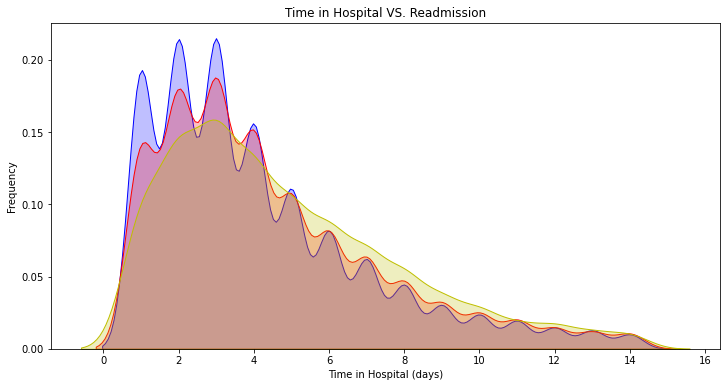

In [88]:
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(dia.loc[(dia['readmitted'] == 'NO'),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
ax=sns.kdeplot(dia.loc[(dia['readmitted'] == '>30'),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
ax=sns.kdeplot(dia.loc[(dia['readmitted'] == '<30'),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
plt.show()

# Data Analysis and Feature Engineering:

# Discharge Disposiiton ID

In [89]:
dia['discharge_disposition_id'] = dia['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

dia = dia[~dia.discharge_disposition_id.isin([11,13,14,19,20,21])]

# Admission Type ID :

In [90]:
dia['admission_source_id'] = dia['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

# Glucose Serum test

We want to make the following changes: 

|Raw Values|New Values|
|---|---|
|none|0
|norm|1
|>200|2
|>300|3

In [91]:
dia['max_glu_serum']=dia['max_glu_serum'].replace("None", 0)
dia['max_glu_serum']=dia['max_glu_serum'].replace("Norm", 1)
dia['max_glu_serum']=dia['max_glu_serum'].replace(">200", 2)
dia['max_glu_serum']=dia['max_glu_serum'].replace(">300", 3)
dia.max_glu_serum.value_counts()

0    67049
1     1717
2      946
3      722
Name: max_glu_serum, dtype: int64

# A1C test :

We want to make the following changes: 

|Raw Values|New Values|
|---|---|
|None|0
|Norm|1
|>7|2
|>8|3

In [92]:
dia['A1Cresult']=dia['A1Cresult'].replace("None", 0)
dia['A1Cresult']=dia['A1Cresult'].replace("Norm", 1)
dia['A1Cresult']=dia['A1Cresult'].replace(">7", 2)
dia['A1Cresult']=dia['A1Cresult'].replace(">8", 3)

# diagnosis feature

In [93]:
#start by setting all values containing E or V into 0 (as one category)
dia.loc[dia['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
dia.loc[dia['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
dia.loc[dia['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
dia.loc[dia['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
dia.loc[dia['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
dia.loc[dia['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0


In [94]:
#No all diag values can be converted into numeric values
dia['diag_1'] = dia['diag_1'].astype(float)
dia['diag_2'] = dia['diag_2'].astype(float)
dia['diag_3'] = dia['diag_3'].astype(float)

In [95]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
dia['diag_1'].loc[(dia['diag_1']>=1) & (dia['diag_1']< 140)] = 1
dia['diag_1'].loc[(dia['diag_1']>=140) & (dia['diag_1']< 240)] = 2
dia['diag_1'].loc[(dia['diag_1']>=240) & (dia['diag_1']< 280)] = 3
dia['diag_1'].loc[(dia['diag_1']>=280) & (dia['diag_1']< 290)] = 4
dia['diag_1'].loc[(dia['diag_1']>=290) & (dia['diag_1']< 320)] = 5
dia['diag_1'].loc[(dia['diag_1']>=320) & (dia['diag_1']< 390)] = 6
dia['diag_1'].loc[(dia['diag_1']>=390) & (dia['diag_1']< 460)] = 7
dia['diag_1'].loc[(dia['diag_1']>=460) & (dia['diag_1']< 520)] = 8
dia['diag_1'].loc[(dia['diag_1']>=520) & (dia['diag_1']< 580)] = 9
dia['diag_1'].loc[(dia['diag_1']>=580) & (dia['diag_1']< 630)] = 10
dia['diag_1'].loc[(dia['diag_1']>=630) & (dia['diag_1']< 680)] = 11
dia['diag_1'].loc[(dia['diag_1']>=680) & (dia['diag_1']< 710)] = 12
dia['diag_1'].loc[(dia['diag_1']>=710) & (dia['diag_1']< 740)] = 13
dia['diag_1'].loc[(dia['diag_1']>=740) & (dia['diag_1']< 760)] = 14
dia['diag_1'].loc[(dia['diag_1']>=760) & (dia['diag_1']< 780)] = 15
dia['diag_1'].loc[(dia['diag_1']>=780) & (dia['diag_1']< 800)] = 16
dia['diag_1'].loc[(dia['diag_1']>=800) & (dia['diag_1']< 1000)] = 17
dia['diag_1'].loc[(dia['diag_1']==-1)] = 0

In [96]:
dia['diag_2'].loc[(dia['diag_2']>=1) & (dia['diag_2']< 140)] = 1
dia['diag_2'].loc[(dia['diag_2']>=140) & (dia['diag_2']< 240)] = 2
dia['diag_2'].loc[(dia['diag_2']>=240) & (dia['diag_2']< 280)] = 3
dia['diag_2'].loc[(dia['diag_2']>=280) & (dia['diag_2']< 290)] = 4
dia['diag_2'].loc[(dia['diag_2']>=290) & (dia['diag_2']< 320)] = 5
dia['diag_2'].loc[(dia['diag_2']>=320) & (dia['diag_2']< 390)] = 6
dia['diag_2'].loc[(dia['diag_2']>=390) & (dia['diag_2']< 460)] = 7
dia['diag_2'].loc[(dia['diag_2']>=460) & (dia['diag_2']< 520)] = 8
dia['diag_2'].loc[(dia['diag_2']>=520) & (dia['diag_2']< 580)] = 9
dia['diag_2'].loc[(dia['diag_2']>=580) & (dia['diag_2']< 630)] = 10
dia['diag_2'].loc[(dia['diag_2']>=630) & (dia['diag_2']< 680)] = 11
dia['diag_2'].loc[(dia['diag_2']>=680) & (dia['diag_2']< 710)] = 12
dia['diag_2'].loc[(dia['diag_2']>=710) & (dia['diag_2']< 740)] = 13
dia['diag_2'].loc[(dia['diag_2']>=740) & (dia['diag_2']< 760)] = 14
dia['diag_2'].loc[(dia['diag_2']>=760) & (dia['diag_2']< 780)] = 15
dia['diag_2'].loc[(dia['diag_2']>=780) & (dia['diag_2']< 800)] = 16
dia['diag_2'].loc[(dia['diag_2']>=800) & (dia['diag_2']< 1000)] = 17
dia['diag_2'].loc[(dia['diag_2']==-1)] = 0

In [97]:
dia['diag_3'].loc[(dia['diag_3']>=1) & (dia['diag_3']< 140)] = 1
dia['diag_3'].loc[(dia['diag_3']>=140) & (dia['diag_3']< 240)] = 2
dia['diag_3'].loc[(dia['diag_3']>=240) & (dia['diag_3']< 280)] = 3
dia['diag_3'].loc[(dia['diag_3']>=280) & (dia['diag_3']< 290)] = 4
dia['diag_3'].loc[(dia['diag_3']>=290) & (dia['diag_3']< 320)] = 5
dia['diag_3'].loc[(dia['diag_3']>=320) & (dia['diag_3']< 390)] = 6
dia['diag_3'].loc[(dia['diag_3']>=390) & (dia['diag_3']< 460)] = 7
dia['diag_3'].loc[(dia['diag_3']>=460) & (dia['diag_3']< 520)] = 8
dia['diag_3'].loc[(dia['diag_3']>=520) & (dia['diag_3']< 580)] = 9
dia['diag_3'].loc[(dia['diag_3']>=580) & (dia['diag_3']< 630)] = 10
dia['diag_3'].loc[(dia['diag_3']>=630) & (dia['diag_3']< 680)] = 11
dia['diag_3'].loc[(dia['diag_3']>=680) & (dia['diag_3']< 710)] = 12
dia['diag_3'].loc[(dia['diag_3']>=710) & (dia['diag_3']< 740)] = 13
dia['diag_3'].loc[(dia['diag_3']>=740) & (dia['diag_3']< 760)] = 14
dia['diag_3'].loc[(dia['diag_3']>=760) & (dia['diag_3']< 780)] = 15
dia['diag_3'].loc[(dia['diag_3']>=780) & (dia['diag_3']< 800)] = 16
dia['diag_3'].loc[(dia['diag_3']>=800) & (dia['diag_3']< 1000)] = 17
dia['diag_3'].loc[(dia['diag_3']==-1)] = 0

In [98]:
#check the results
dia.diag_1.unique()

array([ 3., 11.,  1.,  2.,  7.,  8., 17., 12., 13.,  9.,  0., 16., 10.,
        5.,  6.,  4., 14.])

# Race Feature 

In [99]:
dia['race'].value_counts()

Caucasian          52663
AfricanAmerican    12692
Other               3082
Hispanic            1506
Asian                491
Name: race, dtype: int64

# Gender Feature

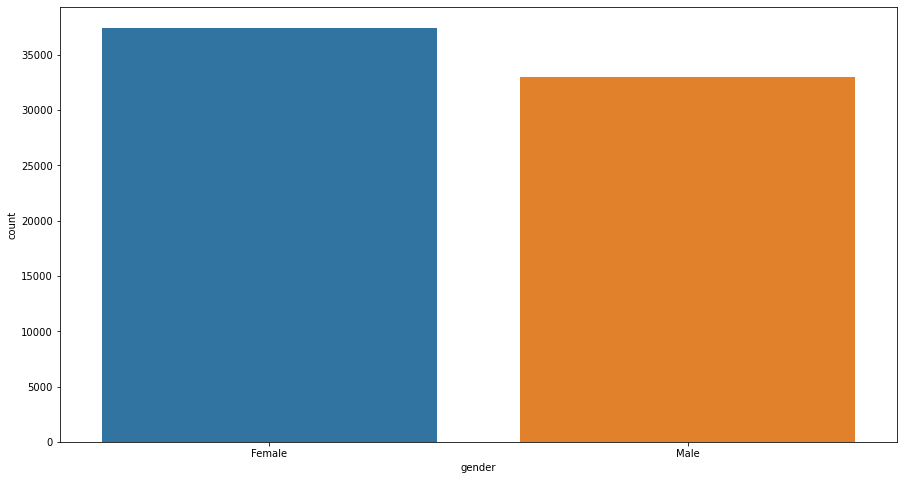

In [100]:
sns.countplot(dia.gender)
plt.show()

In [101]:
dia['gender'] = dia['gender'].replace('Male', 1)
dia['gender'] = dia['gender'].replace('Female', 0)
dia.gender.value_counts()

0    37471
1    32963
Name: gender, dtype: int64

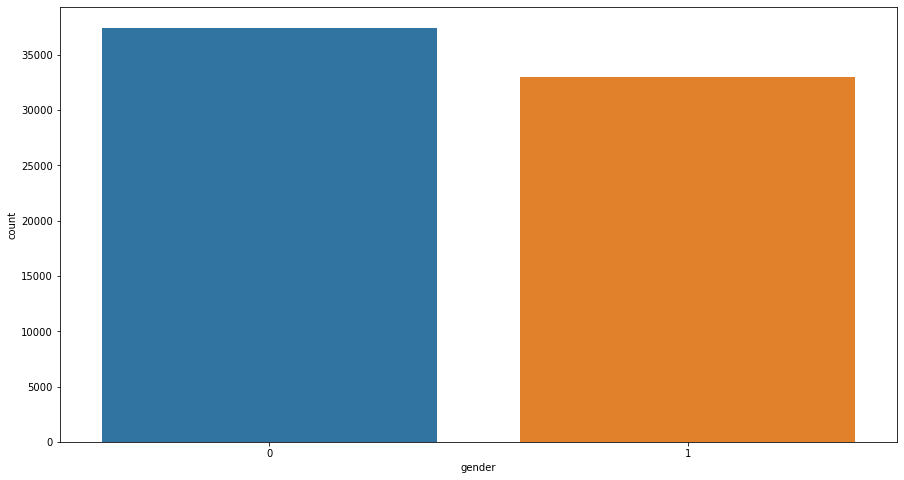

In [102]:
sns.countplot(dia.gender)
plt.show()

### male is coded as 1 and female is coded as 0

# Drugs Features

We still have 7 features, each one represents the change in the patient's dusage of a specific drug, during hospital encounter. Those 7 drugs are the following: 
* metformin                 
*  glimepiride              
*  glipizide              
*  glyburide                
*  pioglitazone             
*  rosiglitazone          
*  insulin     



In [103]:
print('\n',dia.metformin.value_counts(),
'\n',dia.glimepiride.value_counts(),'\n',
'\n',dia.glipizide.value_counts(),'\n',
'\n',dia.glyburide.value_counts(),'\n',
'\n',dia.pioglitazone.value_counts(),'\n',
'\n',dia.rosiglitazone.value_counts(),'\n',
'\n',dia.insulin.value_counts(),'\n',)


 No        55499
Steady    13662
Up          838
Down        435
Name: metformin, dtype: int64 
 No        66721
Steady     3343
Up          232
Down        138
Name: glimepiride, dtype: int64 
 
 No        61384
Steady     8100
Up          575
Down        375
Name: glipizide, dtype: int64 
 
 No        62625
Steady     6773
Up          617
Down        419
Name: glyburide, dtype: int64 
 
 No        65153
Steady     5022
Up          178
Down         81
Name: pioglitazone, dtype: int64 
 
 No        65758
Steady     4468
Up          133
Down         75
Name: rosiglitazone, dtype: int64 
 
 No        34459
Steady    21779
Down       7371
Up         6825
Name: insulin, dtype: int64 



In [104]:
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    dia[i] = dia[i].replace('No', 0)
    dia[i] = dia[i].replace('Steady', 2)
    dia[i] = dia[i].replace('Down', 1)
    dia[i] = dia[i].replace('Up', 3)

In [105]:
print('\n',dia.metformin.value_counts(),'\n',
'\n',dia.glimepiride.value_counts(),'\n',
'\n',dia.glipizide.value_counts(),'\n',
'\n',dia.glyburide.value_counts(),'\n',
'\n',dia.pioglitazone.value_counts(),'\n',
'\n',dia.rosiglitazone.value_counts(),'\n',
'\n',dia.insulin.value_counts(),'\n')


 0    55499
2    13662
3      838
1      435
Name: metformin, dtype: int64 
 
 0    66721
2     3343
3      232
1      138
Name: glimepiride, dtype: int64 
 
 0    61384
2     8100
3      575
1      375
Name: glipizide, dtype: int64 
 
 0    62625
2     6773
3      617
1      419
Name: glyburide, dtype: int64 
 
 0    65153
2     5022
3      178
1       81
Name: pioglitazone, dtype: int64 
 
 0    65758
2     4468
3      133
1       75
Name: rosiglitazone, dtype: int64 
 
 0    34459
2    21779
1     7371
3     6825
Name: insulin, dtype: int64 



# Change Feature 

In [106]:
dia['change'].value_counts()

No    38770
Ch    31664
Name: change, dtype: int64

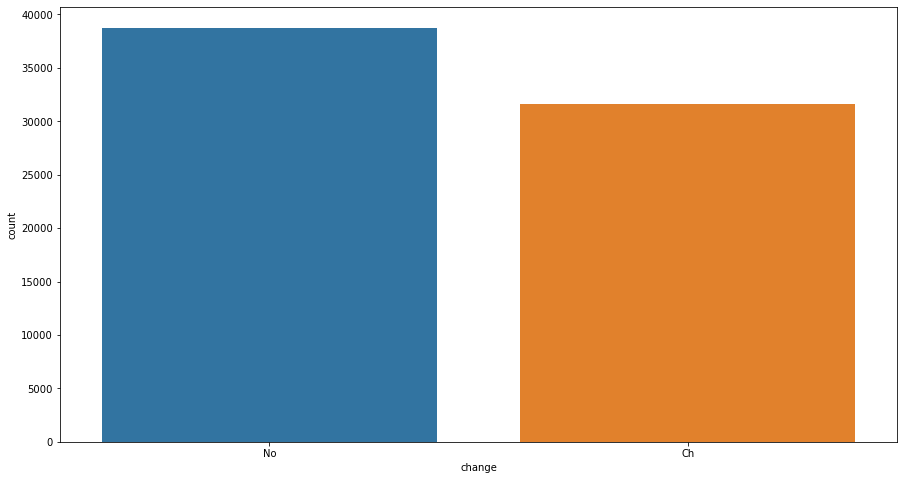

In [107]:
sns.countplot(dia['change'])
plt.show()

In [108]:
dia['change']=dia['change'].replace('No', 0)
dia['change']=dia['change'].replace('Ch', 1)
dia.change.value_counts()

0    38770
1    31664
Name: change, dtype: int64

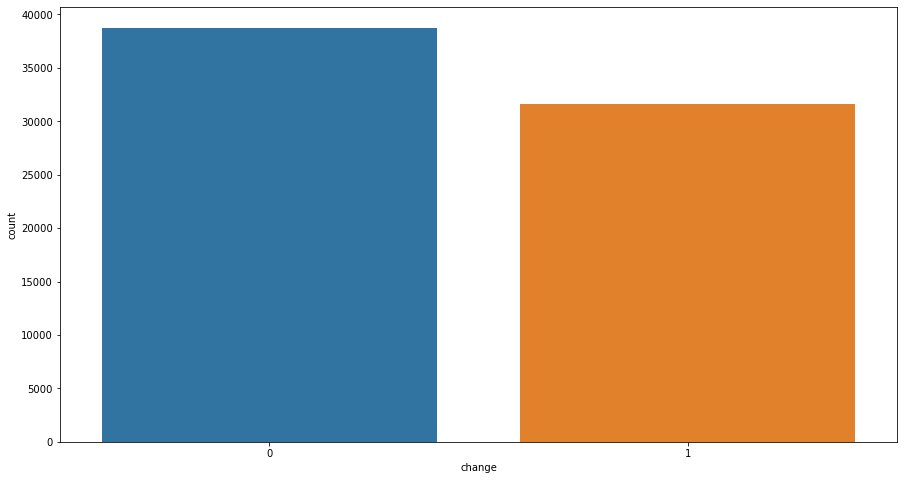

In [109]:
sns.countplot(dia['change'])
plt.show()

# DiabetesMed Feature 

In [110]:
dia['diabetesMed'].value_counts()

Yes    53608
No     16826
Name: diabetesMed, dtype: int64

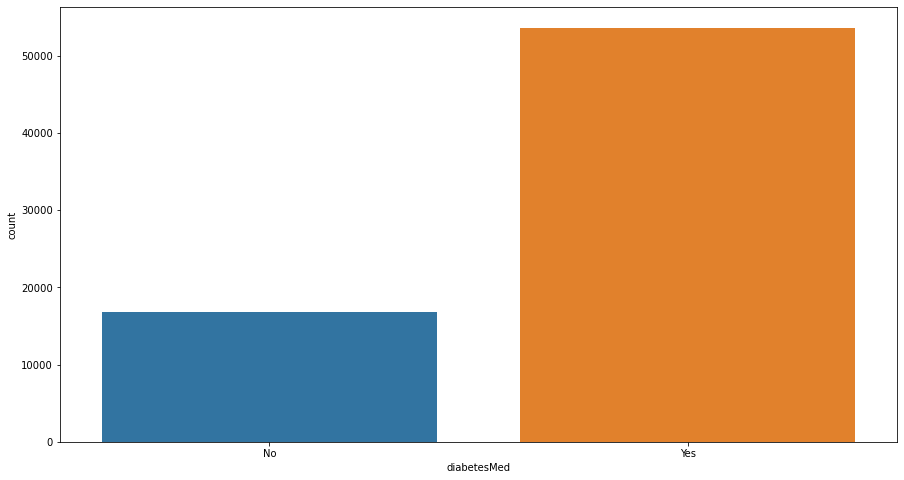

In [111]:
sns.countplot(dia['diabetesMed'])
plt.show()

In [112]:
dia['diabetesMed']=dia['diabetesMed'].replace('Yes', 1)
dia['diabetesMed']=dia['diabetesMed'].replace('No', 0)
dia.diabetesMed.value_counts()

1    53608
0    16826
Name: diabetesMed, dtype: int64

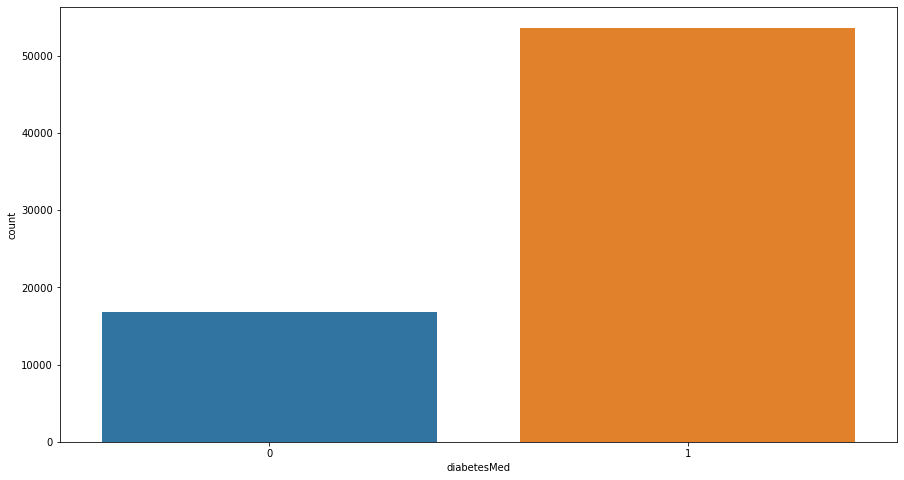

In [113]:
sns.countplot(dia['diabetesMed'])
plt.show()

# Target Feature

In [114]:
dia['readmitted'].value_counts()

NO     41901
>30    22240
<30     6293
Name: readmitted, dtype: int64

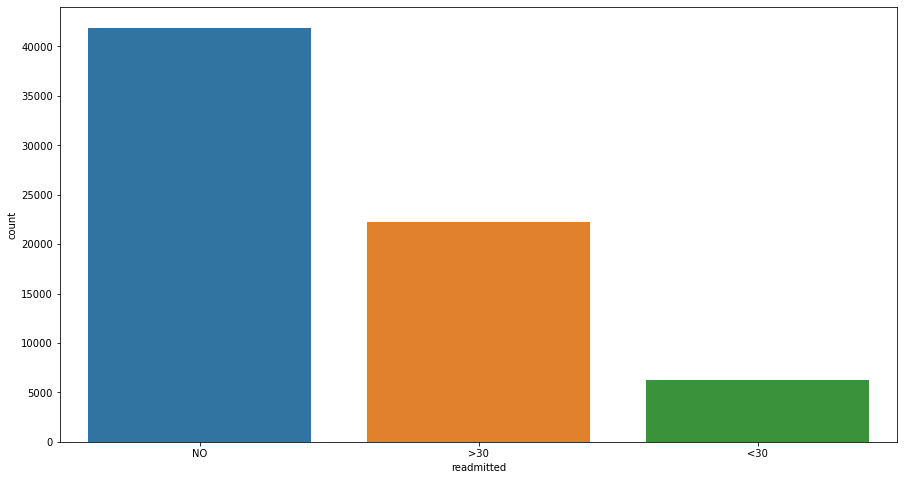

In [115]:
sns.countplot(dia['readmitted'])
plt.show()

In [116]:
print('BEFORE : ',np.unique(dia['readmitted'].values))

dia['readmitted'] = dia['readmitted'].apply(lambda x : 0 if (x == 'NO') else 1)

print('AFTER : ',np.unique(dia['readmitted'].values))

BEFORE :  ['<30' '>30' 'NO']
AFTER :  [0 1]


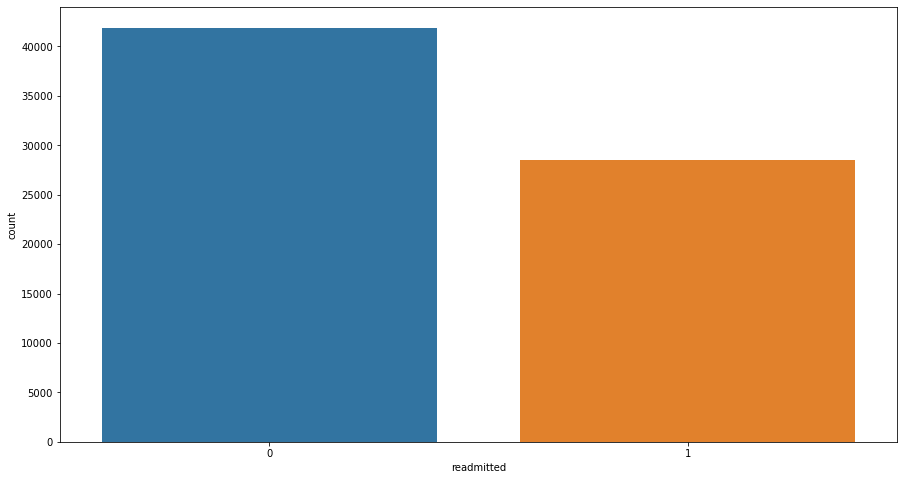

In [117]:
sns.countplot(dia['readmitted'])
plt.show()

In [118]:
dia['readmitted'].value_counts()

0    41901
1    28533
Name: readmitted, dtype: int64

In [119]:
dia.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,0,[0-10),6,18,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,0,[10-20),1,1,7,3,59,0,18,...,0,0,0,0,0,0,3,1,1,1
2,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,...,0,0,2,0,0,0,0,0,1,0
3,Caucasian,1,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,3,1,1,0
4,Caucasian,1,[40-50),1,1,7,1,51,0,8,...,0,0,2,0,0,0,2,1,1,0


In [120]:
pd.options.display.max_columns=None

In [121]:
df=pd.get_dummies(dia,drop_first=True)

In [122]:
df.head()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,0,6,18,1,1,41,0,1,0,0,0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,7,3,59,0,18,0,0,0,3.0,3.0,3.0,9,0,0,0,0,0,0,0,0,3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,1,7,2,11,5,13,2,0,1,11.0,3.0,0.0,6,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,1,7,2,44,1,16,0,0,0,1.0,3.0,7.0,7,0,0,0,0,0,0,0,0,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,1,1,7,1,51,0,8,0,0,0,2.0,2.0,3.0,5,0,0,0,0,2,0,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [123]:
df.columns

Index(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)'],
      dtype='object')

In [124]:
df[['age_10_20','age_20_30','age_30_40','age_40_50','age_50_60','age_60_70','age_70_80','age_80_90','age_90_100']]=df[['age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)']]

In [126]:
df.drop(['age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)'],1,inplace=True)

In [127]:
df.columns

Index(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'age_10_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_50_60',
       'age_60_70', 'age_70_80', 'age_80_90', 'age_90_100'],
      dtype='object')

# Data Processing for Model

In [129]:
X=df.drop('readmitted',axis=1)
y=df['readmitted']

In [130]:
X.columns

Index(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_10_20',
       'age_20_30', 'age_30_40', 'age_40_50', 'age_50_60', 'age_60_70',
       'age_70_80', 'age_80_90', 'age_90_100'],
      dtype='object')

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,stratify=y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((49303, 39), (21131, 39), (49303,), (21131,))

# Different ML Algos :

In [132]:
lr=LogisticRegression()

In [133]:
modellr=lr.fit(X_train,y_train)
predtrain=modellr.predict(X_train)
predtest=modellr.predict(X_test)


In [134]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score

In [135]:
precisiontrain=precision_score(y_train,predtrain)


precisiontest=precision_score(y_test,predtest)

recalltrain=recall_score(y_train,predtrain)

recalltest=recall_score(y_test,predtest)

f1_scoretrain=2*precisiontrain*recalltrain/(precisiontrain+recalltrain)


f1_scoretest=2*precisiontest*recalltest/(precisiontest+recalltest)


In [136]:
print(classification_report(y_train,predtrain))

confusion_matrix(y_train,predtrain)

              precision    recall  f1-score   support

           0       0.63      0.89      0.74     29330
           1       0.59      0.22      0.32     19973

    accuracy                           0.62     49303
   macro avg       0.61      0.56      0.53     49303
weighted avg       0.61      0.62      0.57     49303



array([[26240,  3090],
       [15524,  4449]], dtype=int64)

In [137]:
print(classification_report(y_test,predtest))

confusion_matrix(y_test,predtest)

              precision    recall  f1-score   support

           0       0.63      0.89      0.74     12571
           1       0.58      0.23      0.33      8560

    accuracy                           0.62     21131
   macro avg       0.61      0.56      0.53     21131
weighted avg       0.61      0.62      0.57     21131



array([[11182,  1389],
       [ 6616,  1944]], dtype=int64)

In [138]:
y.value_counts(normalize=True)*100

0    59.489735
1    40.510265
Name: readmitted, dtype: float64

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [140]:
X_test.columns

Index(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_10_20',
       'age_20_30', 'age_30_40', 'age_40_50', 'age_50_60', 'age_60_70',
       'age_70_80', 'age_80_90', 'age_90_100'],
      dtype='object')

In [143]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.618209 (0.015049)
KNN: 0.558082 (0.011474)
DT: 0.542450 (0.013246)
RF: 0.618450 (0.021899)
XGBM: 0.620594 (0.020929)
GB: 0.625975 (0.018955)
LightGBM: 0.626898 (0.023241)


In [149]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="precision_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.605923 (0.024670)
KNN: 0.543800 (0.008729)
DT: 0.543483 (0.009703)
RF: 0.601121 (0.028681)
XGBM: 0.608750 (0.025040)
GB: 0.618565 (0.031016)
LightGBM: 0.617160 (0.032055)


In [145]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.616088 (0.026461)
KNN: 0.536713 (0.011277)
DT: 0.525602 (0.010889)
RF: 0.623289 (0.031334)
XGBM: 0.632873 (0.028160)
GB: 0.637898 (0.030906)
LightGBM: 0.641696 (0.031197)


In [186]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="f1_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.564388 (0.021825)
KNN: 0.546465 (0.007728)
DT: 0.542277 (0.010346)
RF: 0.589155 (0.018603)
XGBM: 0.598497 (0.016569)
GB: 0.579303 (0.020763)
LightGBM: 0.595991 (0.020165)


In [144]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.621808 (0.004150)
KNN: 0.561954 (0.003875)
DT: 0.551062 (0.009909)
RF: 0.623086 (0.005608)
XGBM: 0.627082 (0.005358)
GB: 0.630671 (0.004121)
LightGBM: 0.634748 (0.005680)


In [148]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.625935 (0.010081)
KNN: 0.542286 (0.004841)
DT: 0.538085 (0.006826)
RF: 0.633049 (0.005266)
XGBM: 0.642434 (0.006640)
GB: 0.647211 (0.007390)
LightGBM: 0.653209 (0.007843)


In [141]:
from sklearn.model_selection import GridSearchCV

# Random Forest

In [171]:
random_forest_classification = RandomForestClassifier(random_state = 10)
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GS=GridSearchCV(random_forest_classification,tuned_paramaters,cv=kf,scoring='recall_weighted',n_jobs=-1)
GS.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=True),
             estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [10, 15, 20],
                          'max_features': ['sqrt', 'log2'],
                          'max_leaf_nodes': [2, 5, 8, 11],
                          'min_samples_leaf': [1, 5, 9],
                          'min_samples_split': [2, 5, 8, 11],
                          'n_estimators': [10, 30, 50, 70, 90]}],
             scoring='recall_weighted')

In [172]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [173]:
models = [('rfcgb',RandomForestClassifier(criterion='entropy',max_depth=10,
                                         max_features='sqrt',max_leaf_nodes=8,
                                         min_samples_leaf=1,min_samples_split=2,
                                         n_estimators=10))         ]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

rfcgb: 0.610344 (0.013790)


In [150]:
models = [('rfcgb',RandomForestClassifier(criterion='entropy',max_depth=10,
                                         max_features='sqrt',max_leaf_nodes=8,
                                         min_samples_leaf=1,min_samples_split=2,
                                         n_estimators=10))         ]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

rfcgb: 0.616538 (0.036802)


In [151]:
models = [('rfcgb',RandomForestClassifier(criterion='entropy',max_depth=10,
                                         max_features='sqrt',max_leaf_nodes=8,
                                         min_samples_leaf=1,min_samples_split=2,
                                         n_estimators=10))         ]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

rfcgb: 0.625829 (0.006430)


In [153]:
models = [('rfcgb',RandomForestClassifier(criterion='entropy',max_depth=10,
                                         max_features='sqrt',max_leaf_nodes=8,
                                         min_samples_leaf=1,min_samples_split=2,
                                         n_estimators=10))         ]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

rfcgb: 0.614182 (0.003856)


# XGB Classifier

In [181]:
xgb_model = XGBClassifier(random_state=10)
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GSxgb=GridSearchCV(xgb_model,tuning_parameters,cv=kf,scoring='recall_weighted',n_jobs=-1)
GSxgb.fit(X,y)
print('Best parameters for XGBoost classifier: ', GSxgb.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4} 



In [154]:
models = [('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4))]

results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBM: 0.642328 (0.030942)


In [155]:
models = [('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4))]

results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBM: 0.627238 (0.022589)


In [156]:
models = [('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4))]

results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBM: 0.654142 (0.006462)


In [157]:
models = [('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4))]

results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBM: 0.635539 (0.005656)


In [158]:
xgbtuned=XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4)

In [159]:
xgbtuned=xgbtuned.fit(X_train,y_train)

[20:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [160]:
predtrainxgb=xgbtuned.predict(X_train)
predtestxgb=xgbtuned.predict(X_test)


In [161]:
print(classification_report(y_train,predtrainxgb))

confusion_matrix(y_train,predtrain)

              precision    recall  f1-score   support

           0       0.66      0.87      0.75     29330
           1       0.65      0.34      0.45     19973

    accuracy                           0.66     49303
   macro avg       0.66      0.61      0.60     49303
weighted avg       0.66      0.66      0.63     49303



array([[26240,  3090],
       [15524,  4449]], dtype=int64)

In [162]:
print(classification_report(y_test,predtestxgb))

confusion_matrix(y_test,predtest)

              precision    recall  f1-score   support

           0       0.65      0.85      0.73     12571
           1       0.59      0.31      0.41      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.58      0.57     21131
weighted avg       0.62      0.63      0.60     21131



array([[11182,  1389],
       [ 6616,  1944]], dtype=int64)

# LightGBM Classifier

In [ ]:
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [ ]:
gkf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='recall_weighted',n_jobs=-1)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X, y)

In [ ]:
print(lgb_model.best_params_, lgb_model.best_score_)

In [187]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(criterion='entropy',max_depth=10,
                                         max_features='sqrt',max_leaf_nodes=8,
                                         min_samples_leaf=1,min_samples_split=2,
                                         n_estimators=10)),
          ('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4)),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier(lambda_l1= 1.5, lambda_l2=1, min_data_in_leaf= 30, num_leaves= 31, reg_alpha= 0.1))]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.616088 (0.026461)
KNN: 0.536713 (0.011277)
DT: 0.526177 (0.009618)
RF: 0.617489 (0.034786)
XGBM: 0.642328 (0.030942)
GB: 0.637904 (0.030906)
LightGBM: 0.642781 (0.030705)


In [188]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(criterion='entropy',max_depth=10,
                                         max_features='sqrt',max_leaf_nodes=8,
                                         min_samples_leaf=1,min_samples_split=2,
                                         n_estimators=10)),
          ('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4)),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier(lambda_l1= 1.5, lambda_l2=1, min_data_in_leaf= 30, num_leaves= 31, reg_alpha= 0.1))]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.618209 (0.015049)
KNN: 0.558082 (0.011474)
DT: 0.540946 (0.011470)
RF: 0.606596 (0.005203)
XGBM: 0.627238 (0.022589)
GB: 0.625975 (0.018955)
LightGBM: 0.626486 (0.023271)


In [189]:
models = [('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4)),
          ]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBM: 0.627238 (0.022589)


In [190]:
models = [('XGBM', XGBClassifier(base_estimator=modellr,gamma= 0, learning_rate = 0.2,max_depth= 4)),
          ]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBM: 0.642328 (0.030942)


In [198]:
models = [("LightGBM", LGBMClassifier(lambda_l1= 1.5, lambda_l2=1, min_data_in_leaf= 30, num_leaves= 31, reg_alpha= 0.1))]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="recall_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LightGBM: 0.626486 (0.023271)


In [197]:
models = [("LightGBM", LGBMClassifier(lambda_l1= 1.5, lambda_l2=1, min_data_in_leaf= 30, num_leaves= 31, reg_alpha= 0.1))]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="roc_auc",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LightGBM: 0.642781 (0.030705)


In [197]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10,stratify=y)

In [198]:
light=LGBMClassifier(lambda_l1= 1.5, lambda_l2=1, min_data_in_leaf= 30, num_leaves= 31, reg_alpha= 0.1)

In [199]:
model_light=light.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


In [200]:
predict_test=model_light.predict(X_test)

In [201]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73     12571
           1       0.58      0.33      0.42      8560

    accuracy                           0.63     21131
   macro avg       0.61      0.58      0.58     21131
weighted avg       0.62      0.63      0.60     21131



In [202]:
print(roc_auc_score(y_test,predict_test))

0.5837595913157192


<AxesSubplot:>

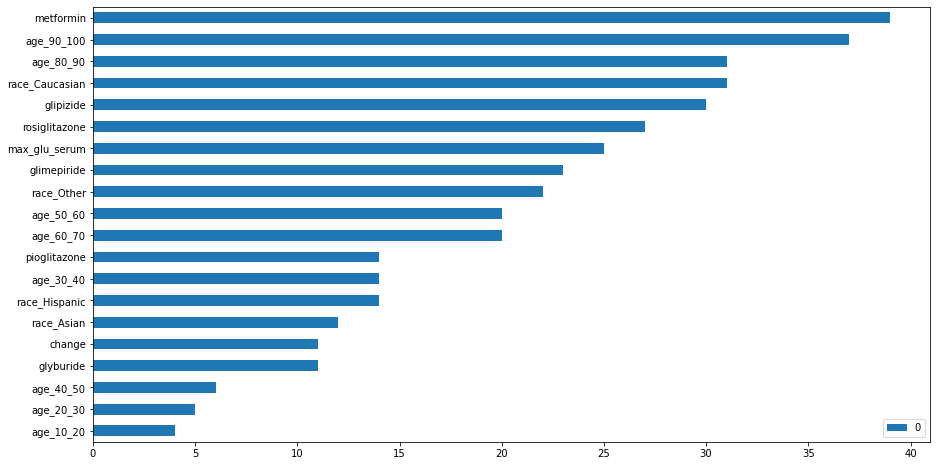

In [205]:
pd.DataFrame(model_light.feature_importances_,index=X_train.columns).sort_values(0,ascending=True).head(20).plot(kind='barh')

In [ ]:
we choose Lightgbm 

## Model Deploy

In [163]:
from sklearn import set_config

set_config(display='diagram')

In [164]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [180]:
cat_transformation=ColumnTransformer([
    ('encode',OneHotEncoder(drop = "first",sparse=False,handle_unknown='ignore'),[1,2,4,5,6])
],remainder='passthrough')

In [181]:
light_pipeline=Pipeline([('preprocessing',cat_transformation),
                     ('model_light',LGBMClassifier(lambda_l1= 1.5,
                                                lambda_l2=1,
                                                min_data_in_leaf= 30, 
                                                num_leaves= 31,
                                                reg_alpha= 0.1,
                                                random_state=10))
                     ])

In [182]:
light_pipeline.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 4, 5, 6])])),
                ('model_light',
                 LGBMClassifier(lambda_l1=1.5, lambda_l2=1, min_data_in_leaf=30,
                                random_state=10, reg_alpha=0.1))])

In [184]:
light_pipeline.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
import joblib

In [186]:
joblib.dump(light_pipeline,'Lightgbmmodel.pkl')

['Lightgbmmodel.pkl']

In [195]:
light_pipeline.feature_names_in_

array(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2',
       'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'age_10_20', 'age_20_30', 'age_30_40', 'age_40_50',
       'age_50_60', 'age_60_70', 'age_70_80', 'age_80_90', 'age_90_100'],
      dtype=object)

In [217]:
df22=pd.read_csv('diabetic_data.csv')
df22.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [216]:
for cal in df22.select_dtypes(include='object').columns:
    print(cal)
    print(df22[cal].unique(),'\n')

race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender
['Female' 'Male' 'Unknown/Invalid'] 

age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurolog

['No' 'Steady'] 

pioglitazone
['No' 'Steady' 'Up' 'Down'] 

rosiglitazone
['No' 'Steady' 'Up' 'Down'] 

acarbose
['No' 'Steady' 'Up' 'Down'] 

miglitol
['No' 'Steady' 'Down' 'Up'] 

troglitazone
['No' 'Steady'] 

tolazamide
['No' 'Steady' 'Up'] 

examide
['No'] 

citoglipton
['No'] 

insulin
['No' 'Up' 'Steady' 'Down'] 

glyburide-metformin
['No' 'Steady' 'Down' 'Up'] 

glipizide-metformin
['No' 'Steady'] 

glimepiride-pioglitazone
['No' 'Steady'] 

metformin-rosiglitazone
['No' 'Steady'] 

metformin-pioglitazone
['No' 'Steady'] 

change
['No' 'Ch'] 

diabetesMed
['No' 'Yes'] 

readmitted
['NO' '>30' '<30'] 



In [220]:
dia.dtypes

race                         object
gender                        int64
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                  int64
rosiglitazone                 int64
insulin                       int64
change                        int64
diabetesMed                 

In [221]:
dia.admission_type_id.value_counts()

1    35768
3    13835
2    12861
6     4530
5     3122
8      291
7       18
4        9
Name: admission_type_id, dtype: int64